<a href="https://colab.research.google.com/github/barun420/Bankruptcy-Prediction-of-a-firm/blob/main/EPGC_Assignment2_Bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV

# Loading of Dataset and reading it

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Checking Shape of the table

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# **EDA**

General Info about the Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Statistical Details of the features

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Unique values for each Column

In [ ]:
for col in df.columns:
      print(f"unique values for {col}:")
      print(df[col].unique())

unique values for Bankrupt?:
[1 0]
unique values for  ROA(C) before interest and depreciation before interest:
[0.37059426 0.46429094 0.42607127 ... 0.47433335 0.54789646 0.49953688]
unique values for  ROA(A) before interest and % after tax:
[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]
unique values for  ROA(B) before interest and depreciation after tax:
[0.40574977 0.51673002 0.47229509 ... 0.63172547 0.52417153 0.52063815]
unique values for  Operating Gross Margin:
[0.60145721 0.61023509 0.60145001 ... 0.60445524 0.61044408 0.62740887]
unique values for  Realized Sales Gross Margin:
[0.60145721 0.61023509 0.60136352 ... 0.60601191 0.61316825 0.62740887]
unique values for  Operating Profit Rate:
[0.9989692  0.99894598 0.99885735 ... 0.998741   0.99917649 0.9980803 ]
unique values for  Pre-tax net Interest Rate:
[0.79688715 0.79738019 0.79640337 ... 0.79741851 0.79711845 0.80198665]
unique values for  After-tax net Interest Rate:
[0.80880936 0.80930073 0.8083

# Q1)**Data Preprocessing and Cleaning along with noise removal**

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Null value check

In [ ]:
df.isna().sum().sum()

np.int64(0)

Duplicate value Check

In [ ]:
df.duplicated().sum().sum()

np.int64(0)

Renaming the Target column

In [ ]:
df=df.rename(columns={'Bankrupt?':'Bankrupt'})

Checking the Outliers

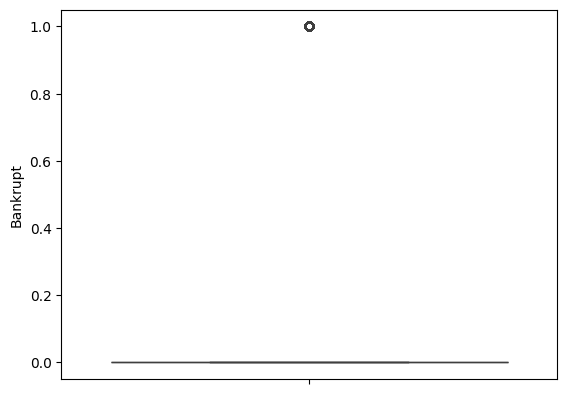

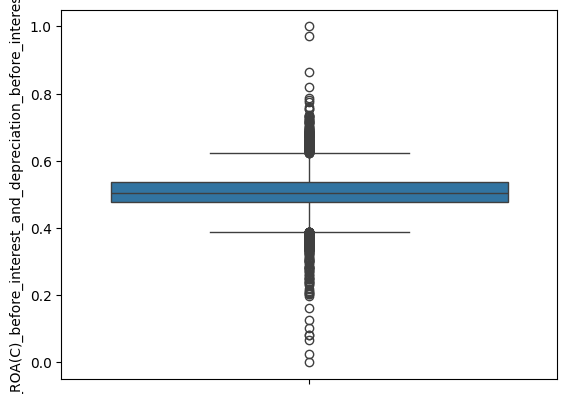

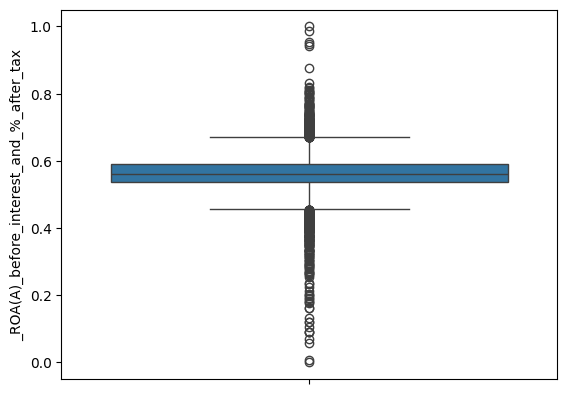

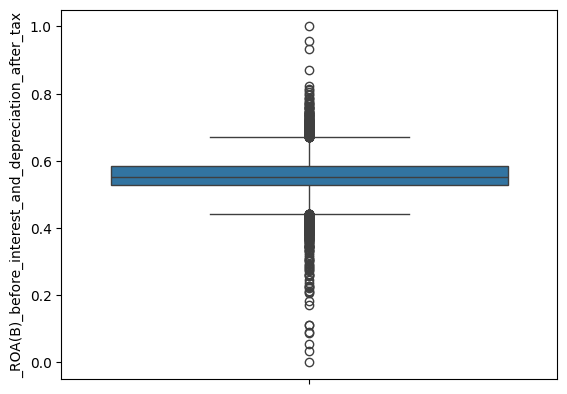

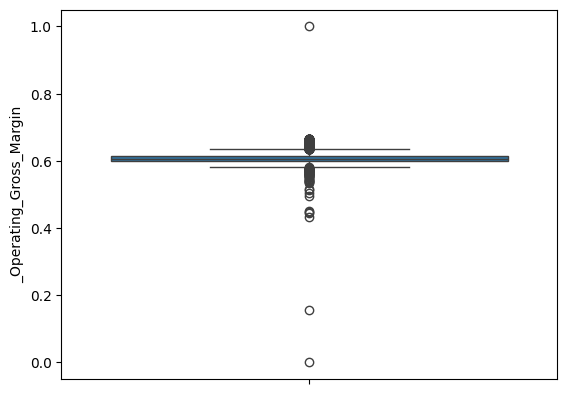

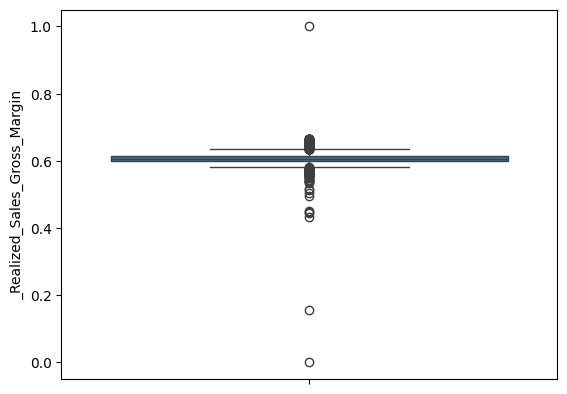

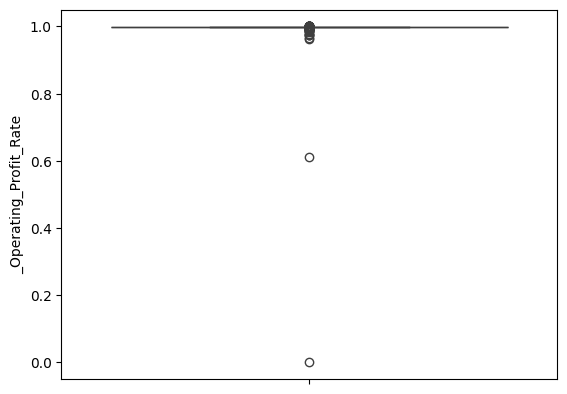

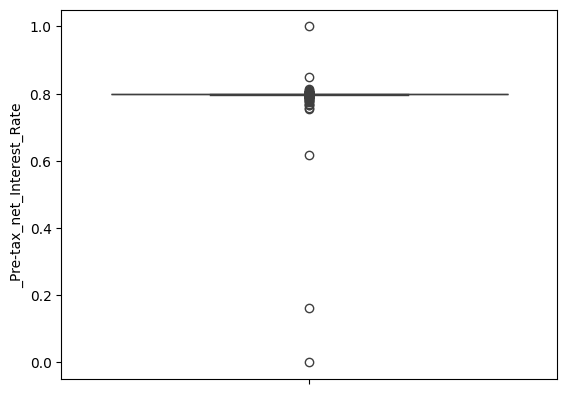

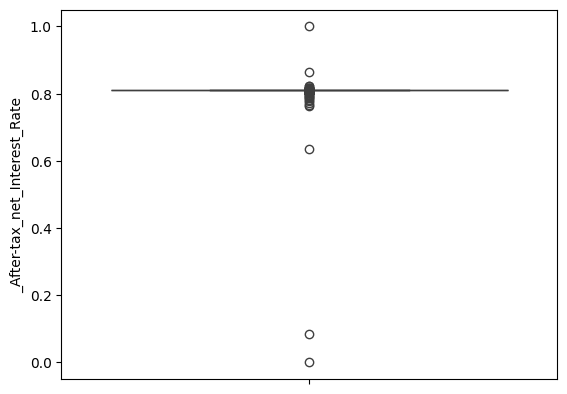

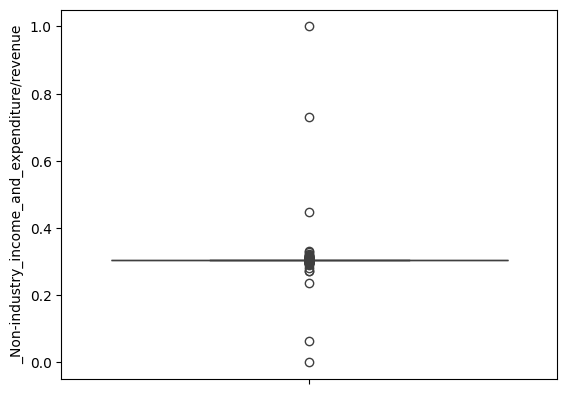

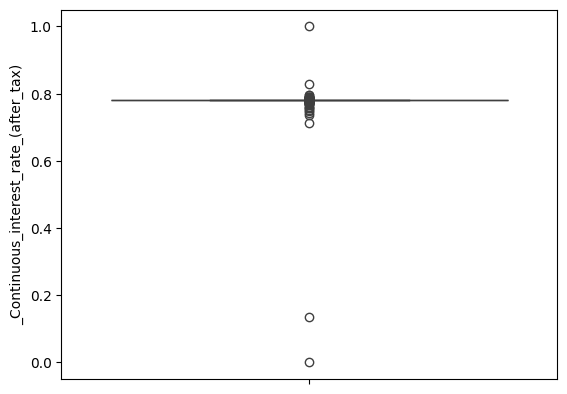

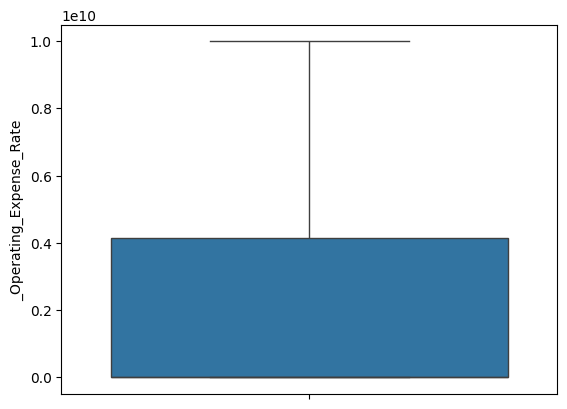

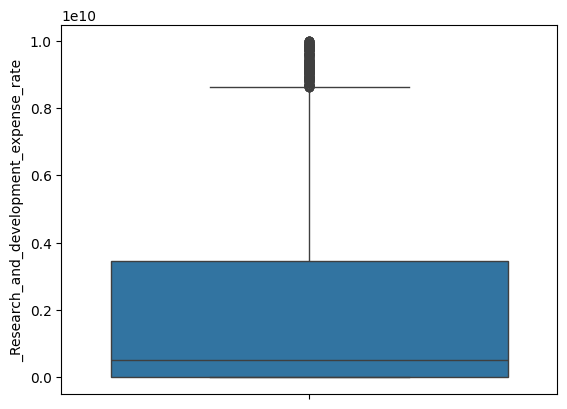

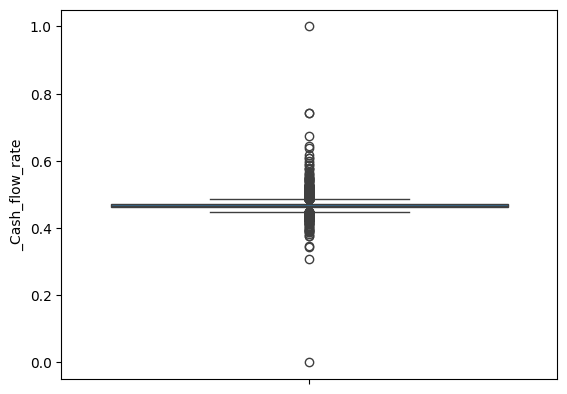

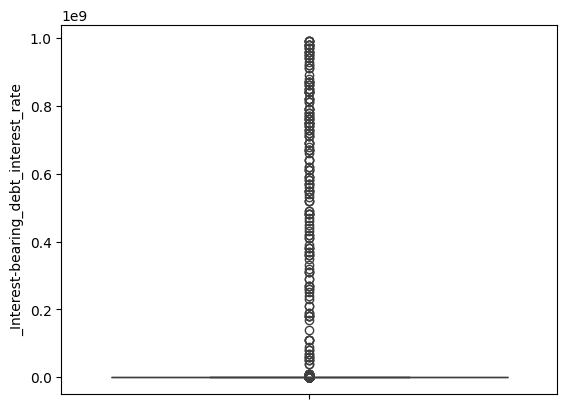

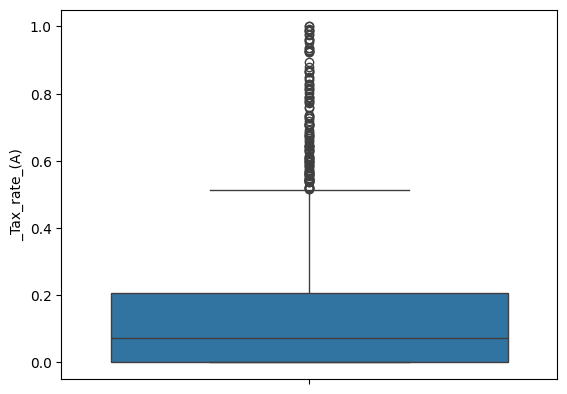

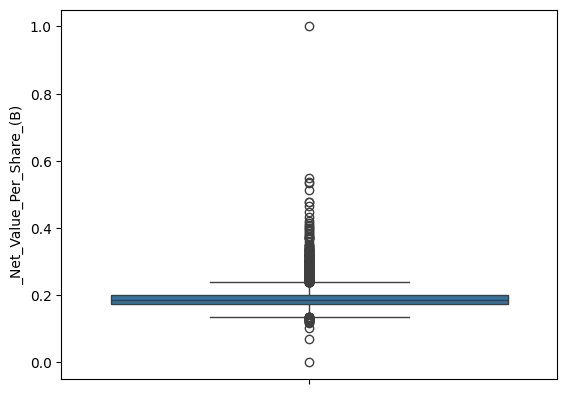

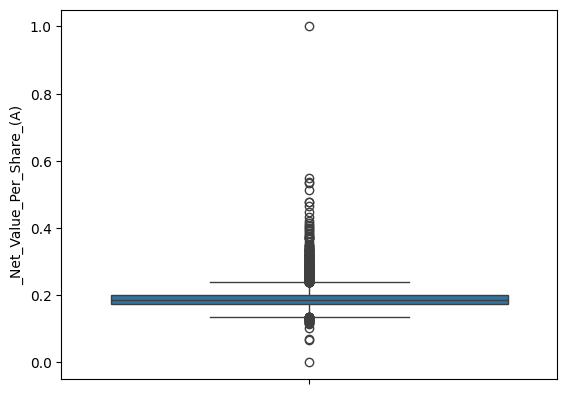

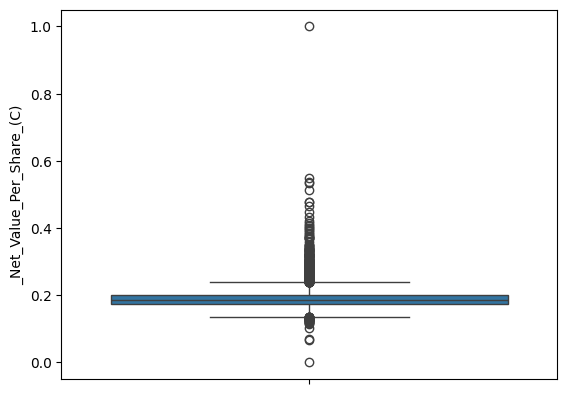

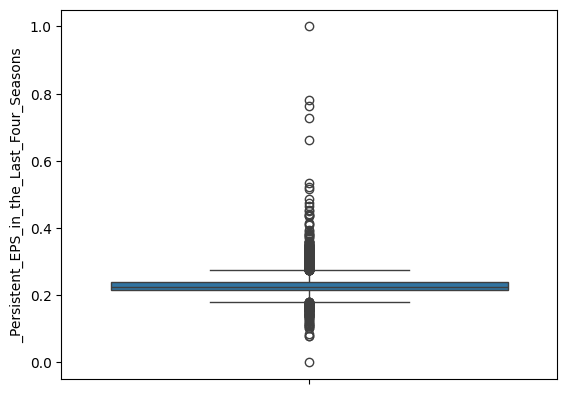

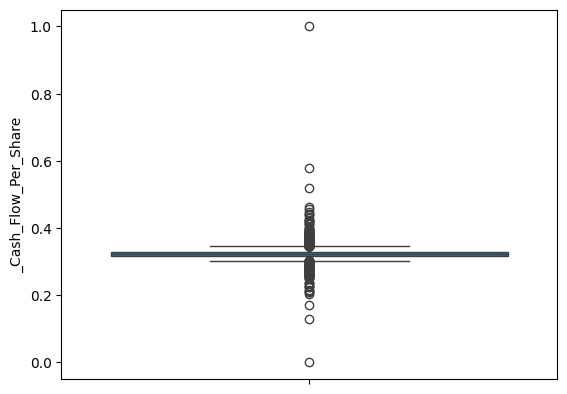

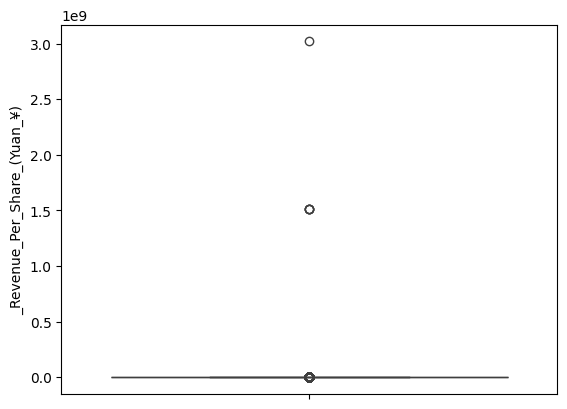

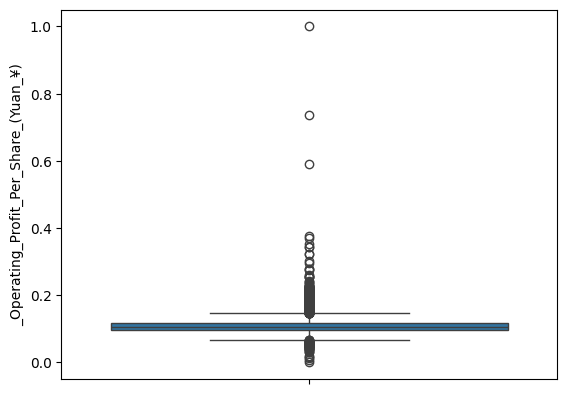

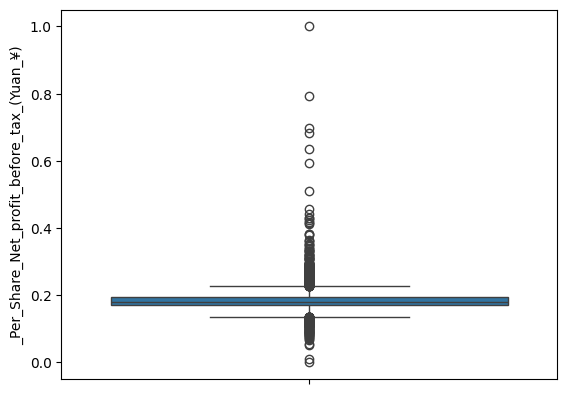

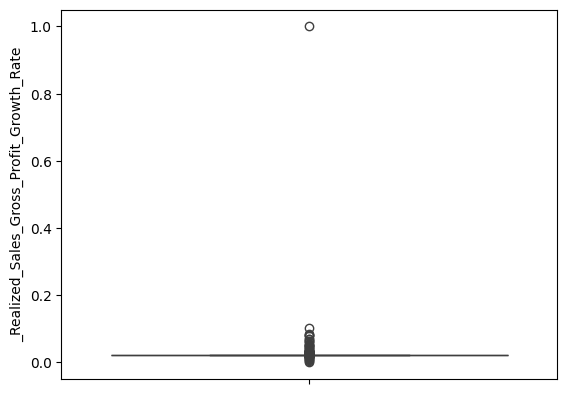

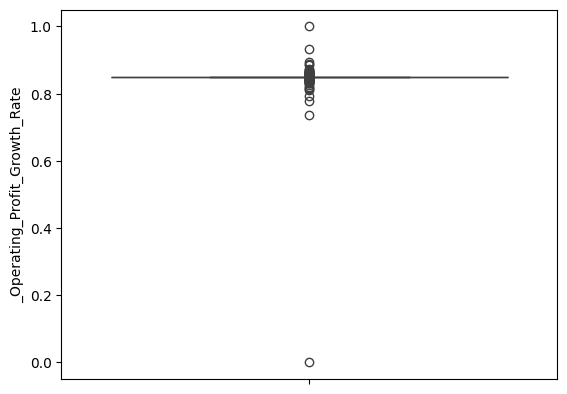

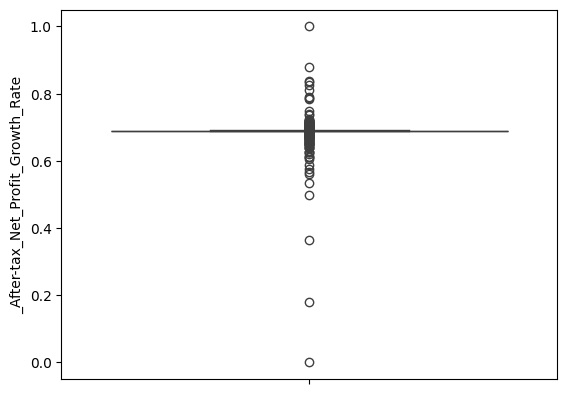

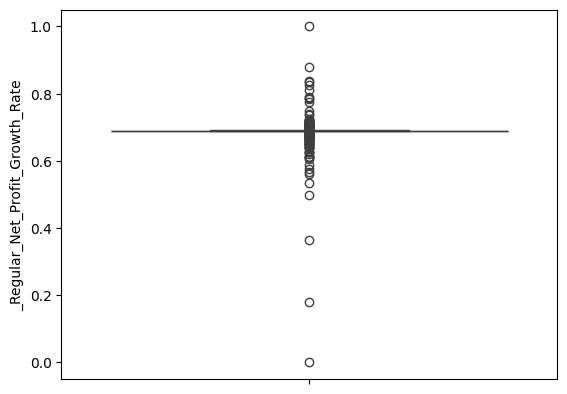

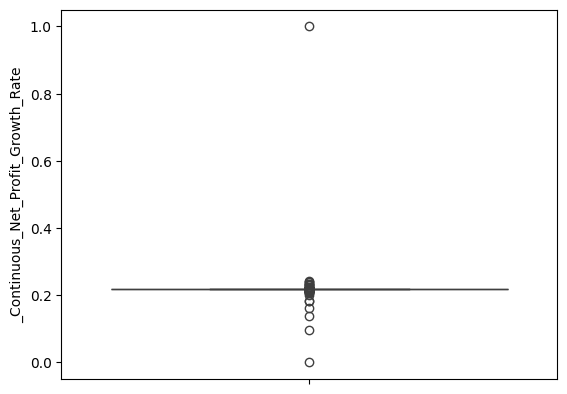

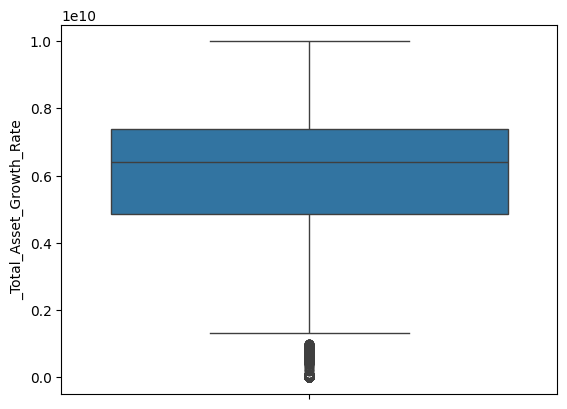

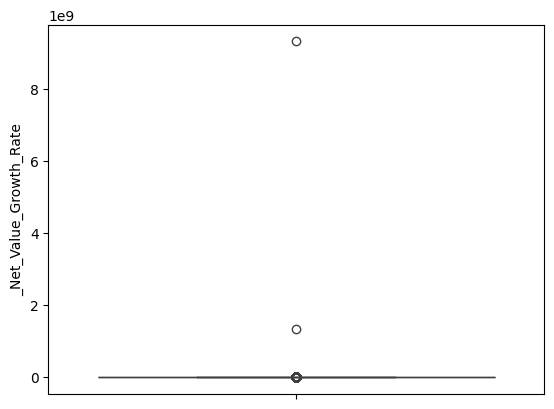

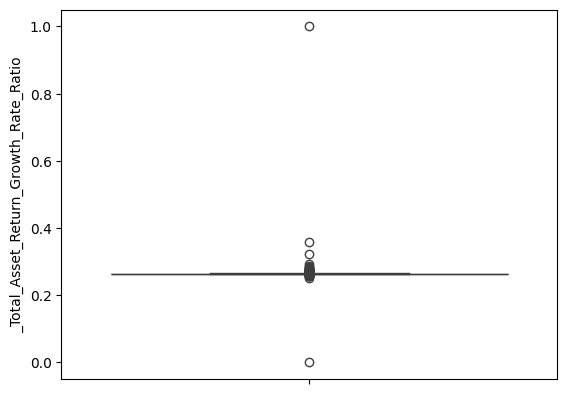

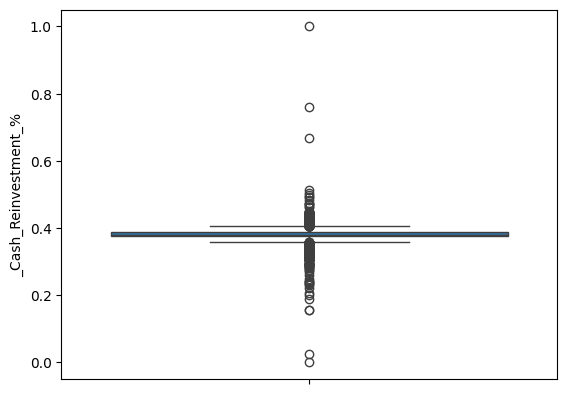

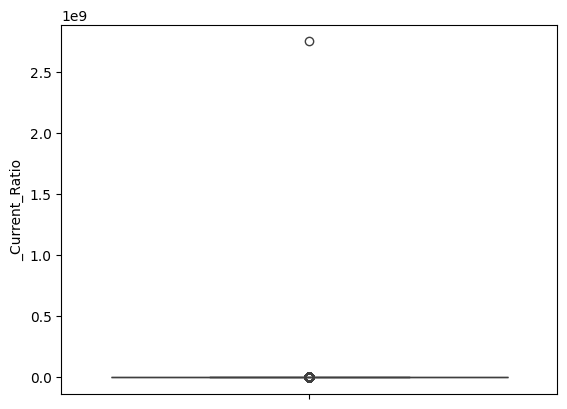

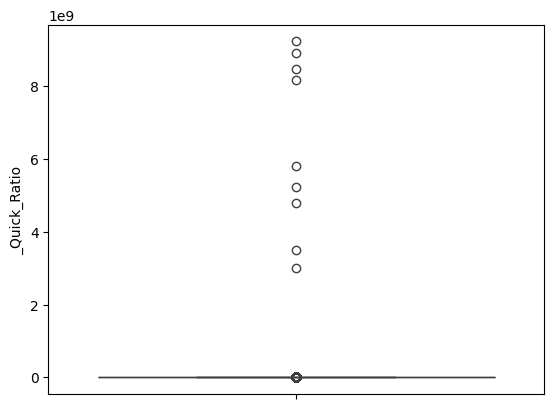

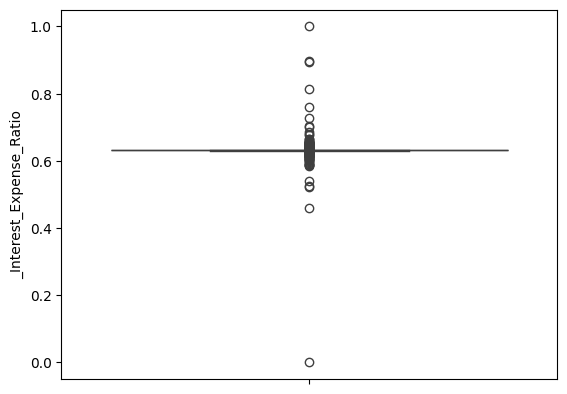

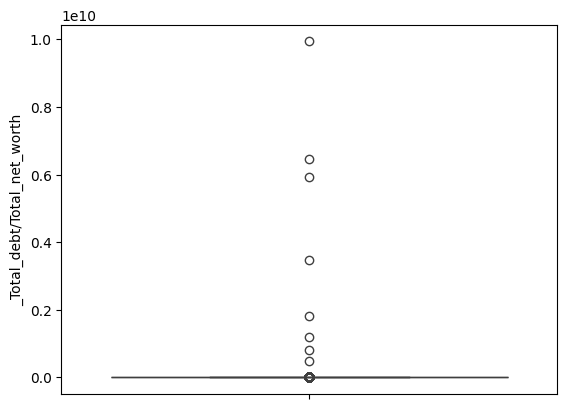

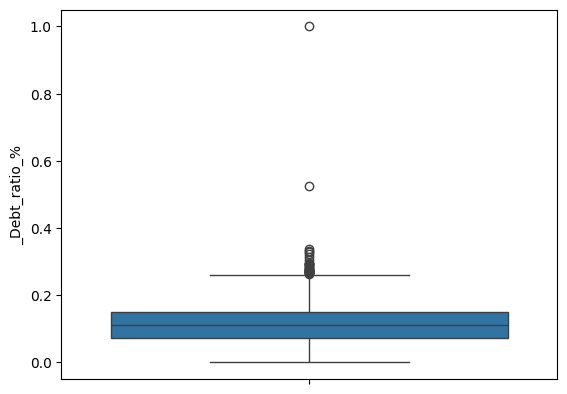

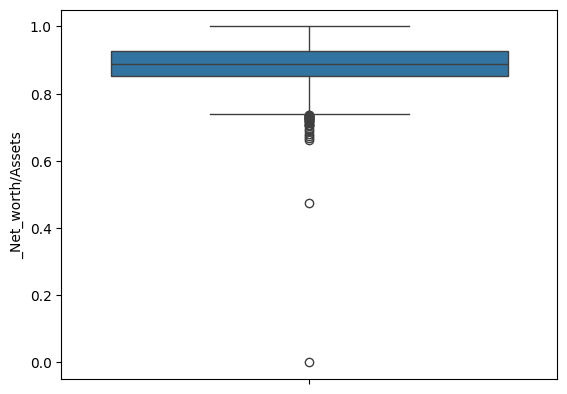

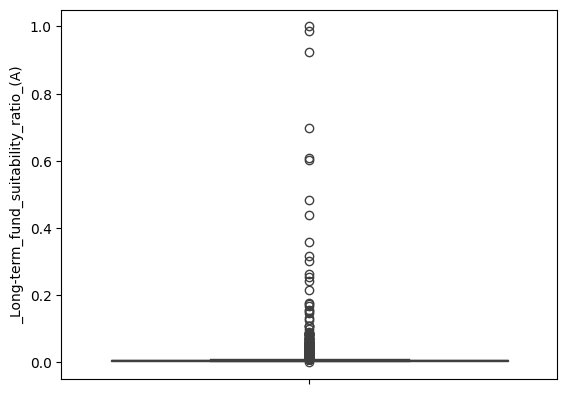

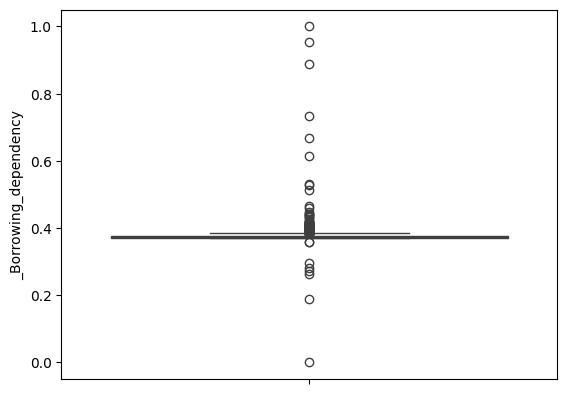

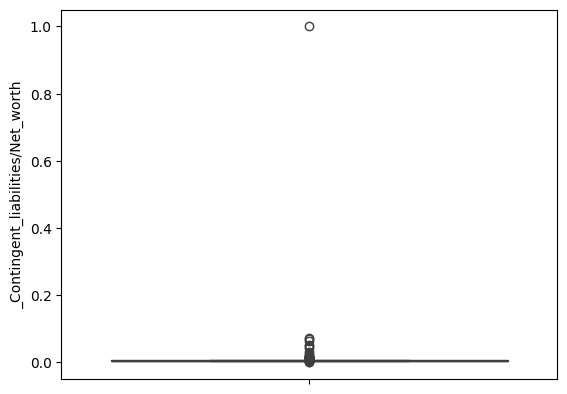

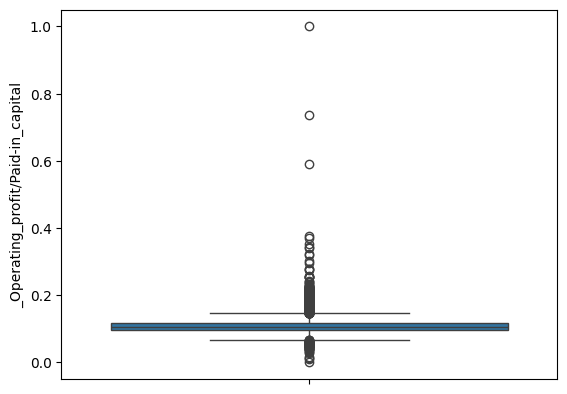

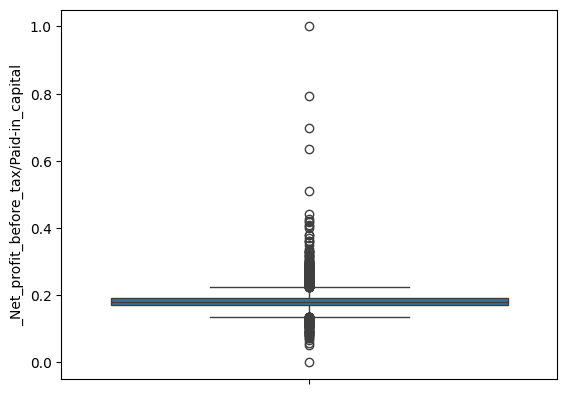

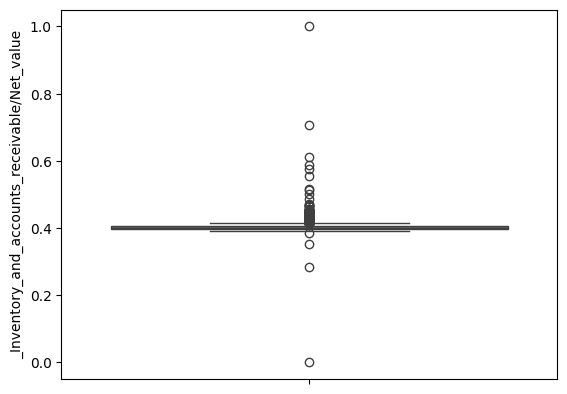

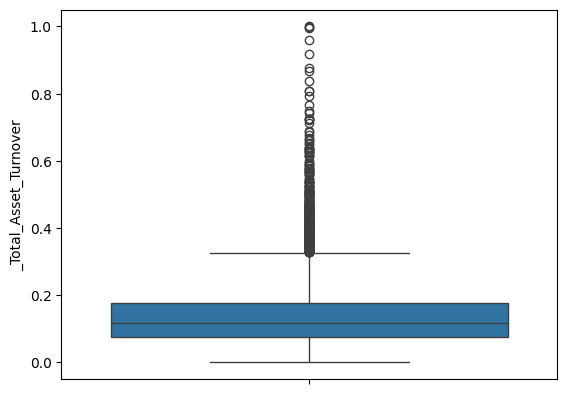

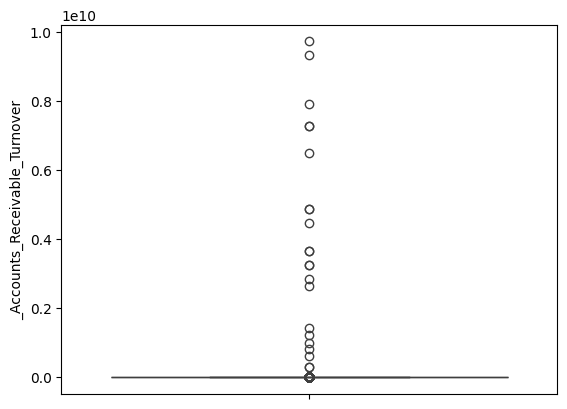

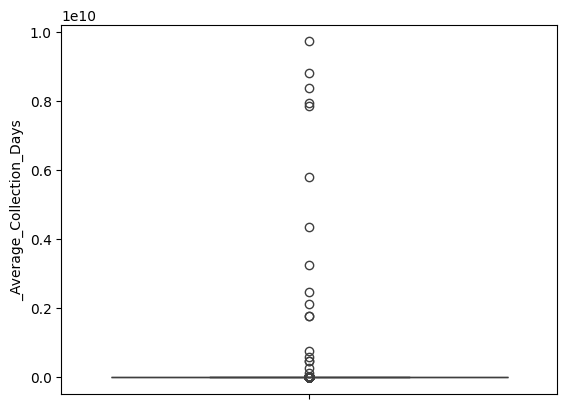

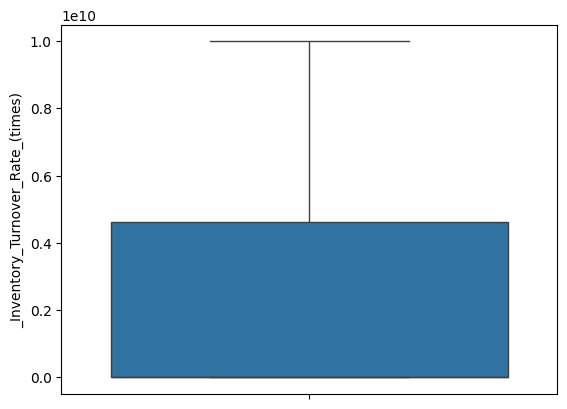

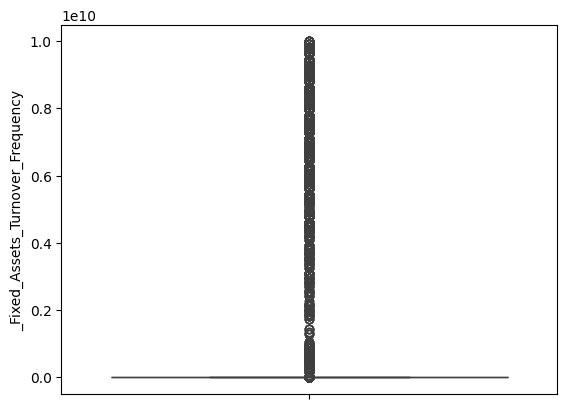

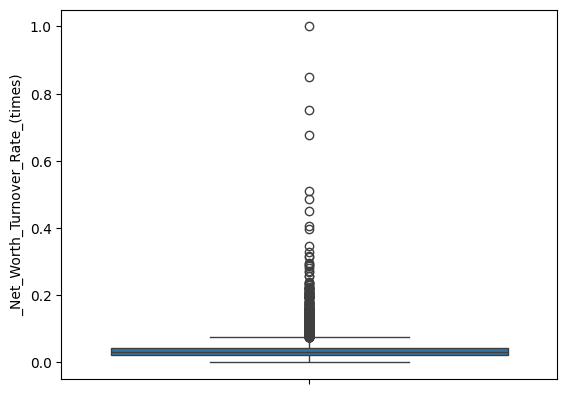

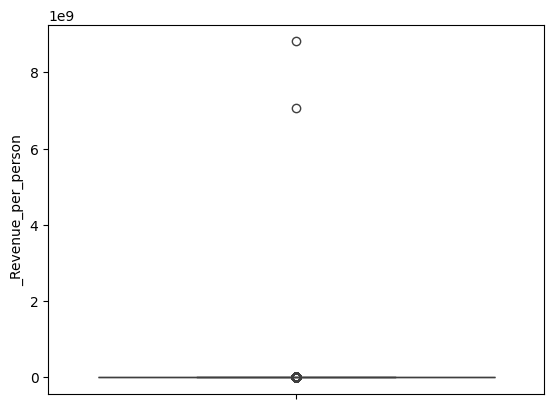

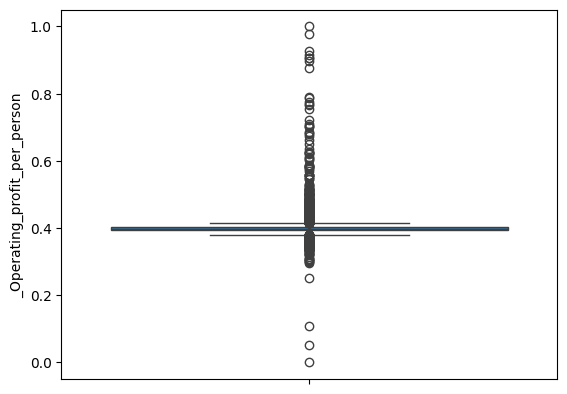

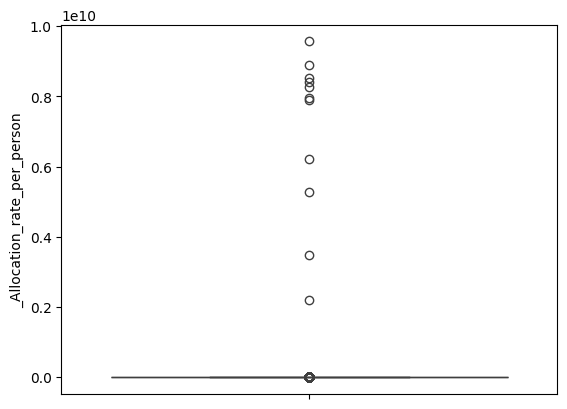

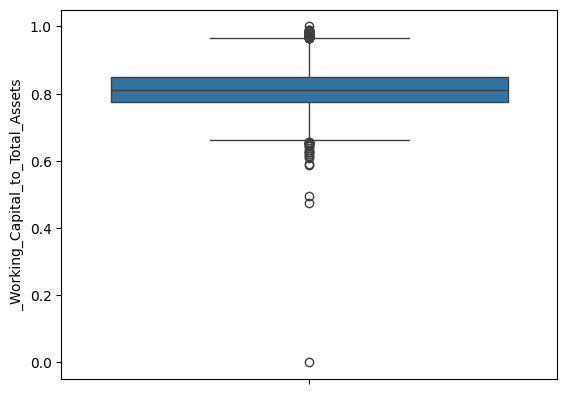

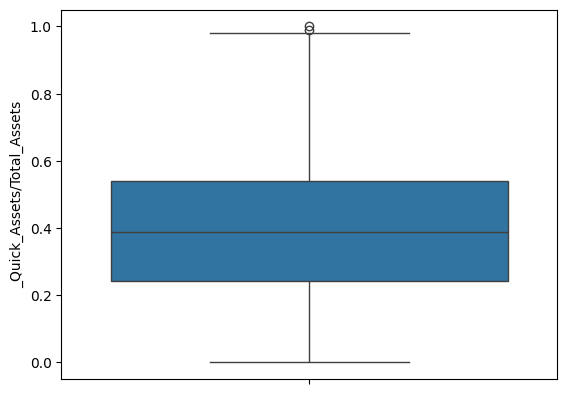

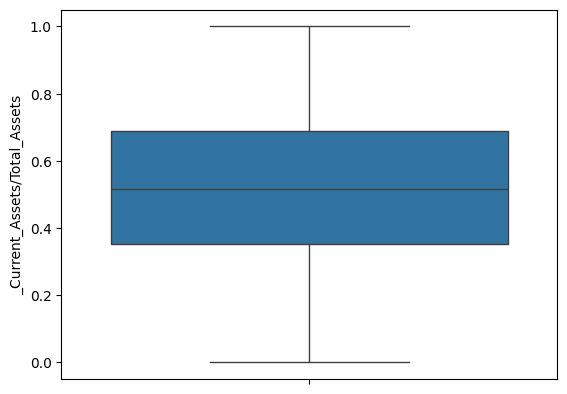

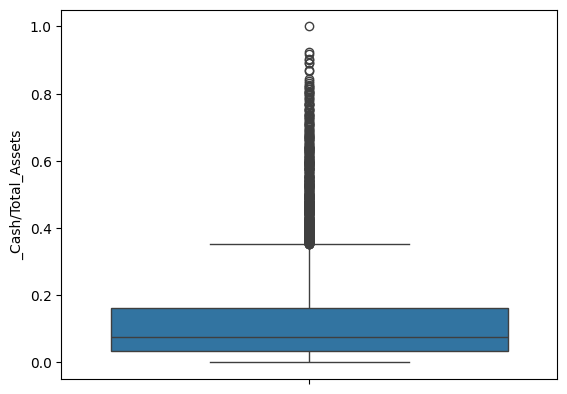

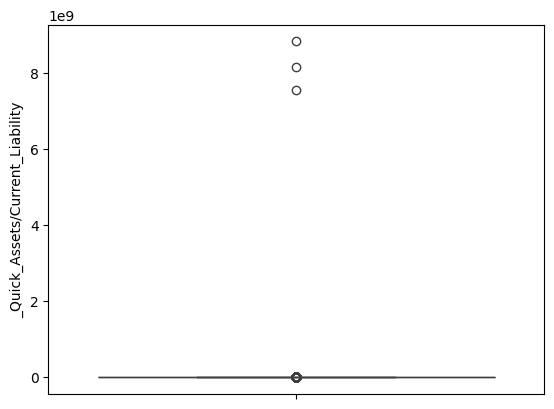

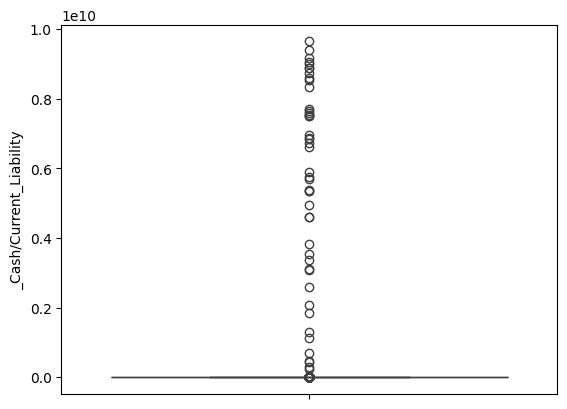

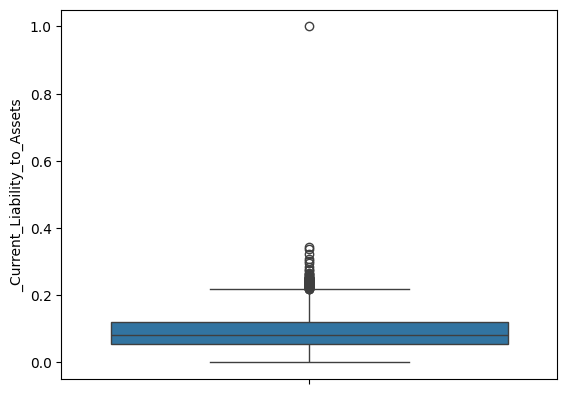

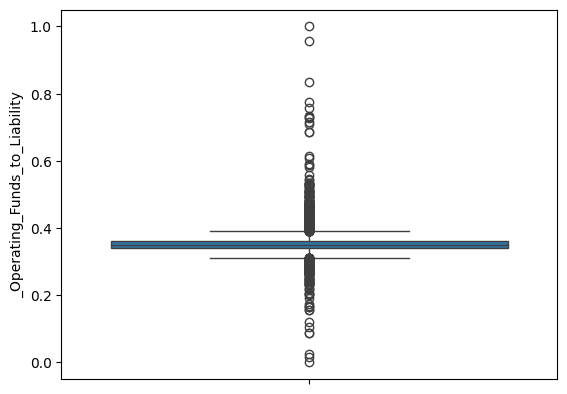

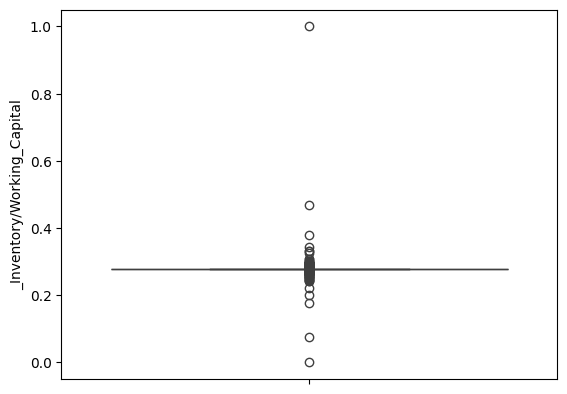

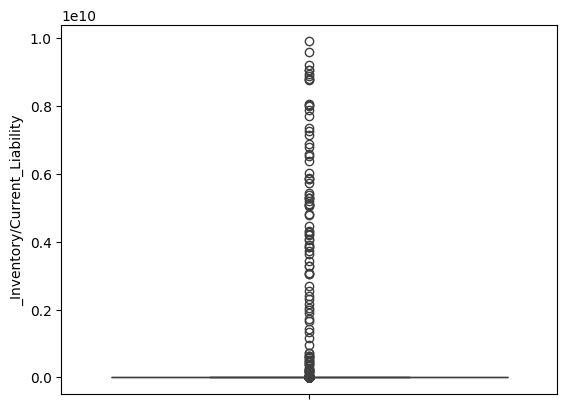

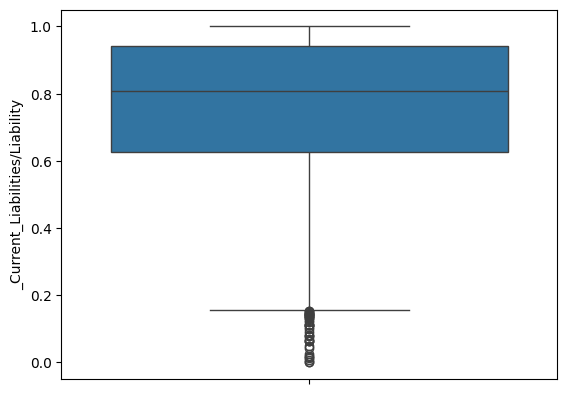

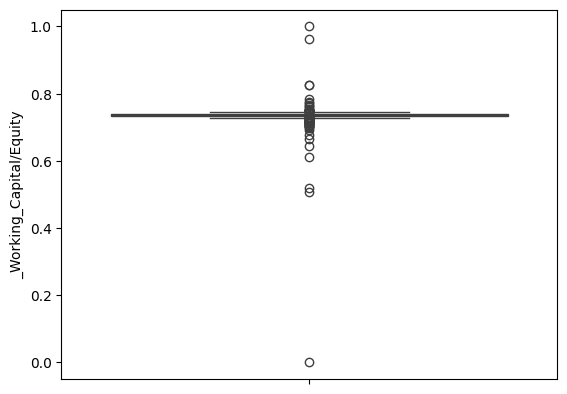

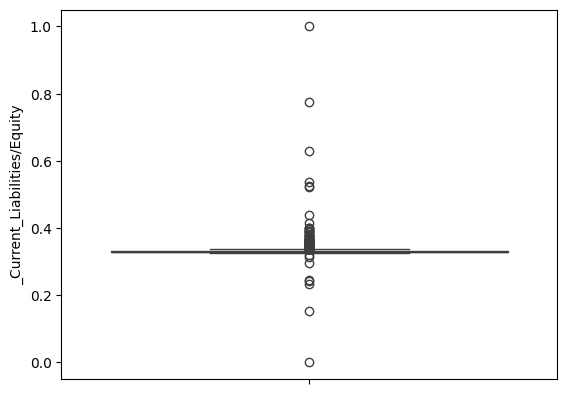

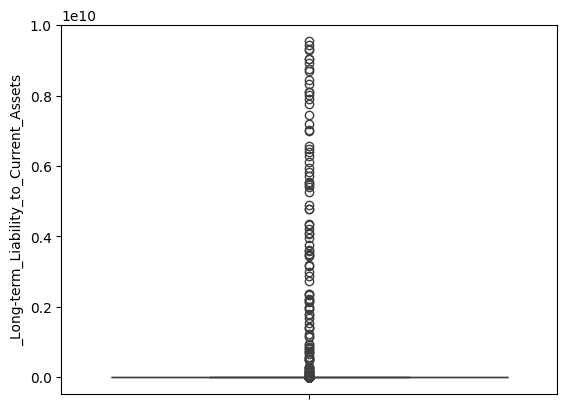

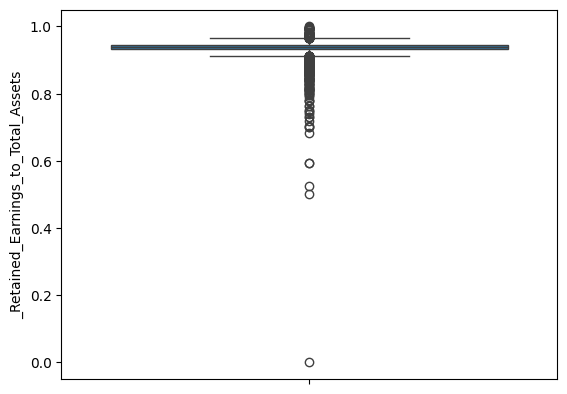

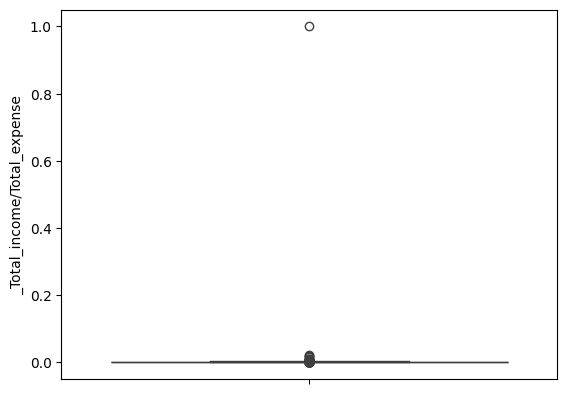

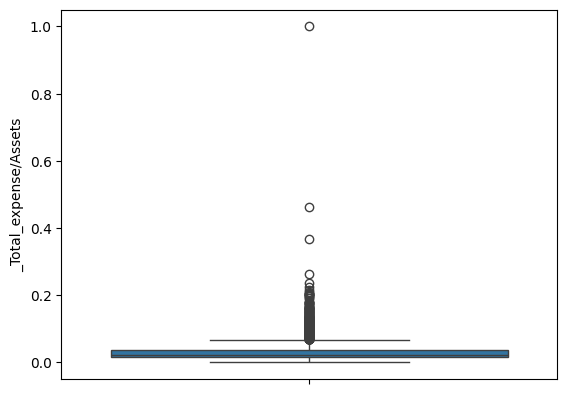

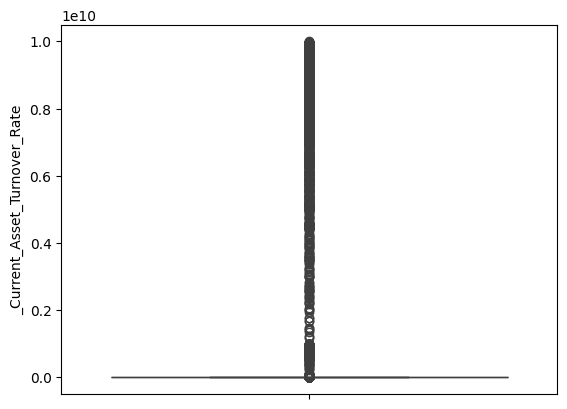

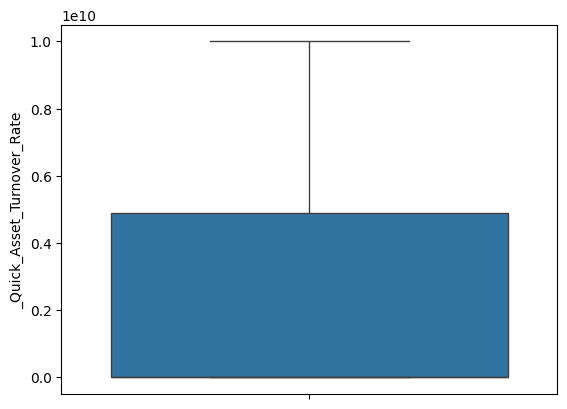

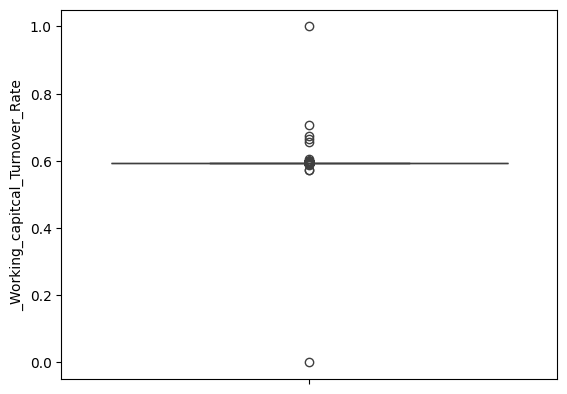

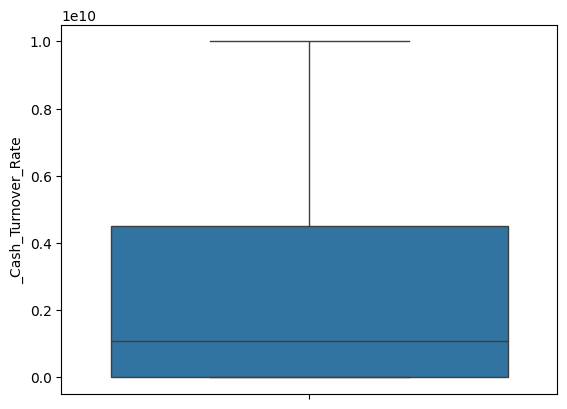

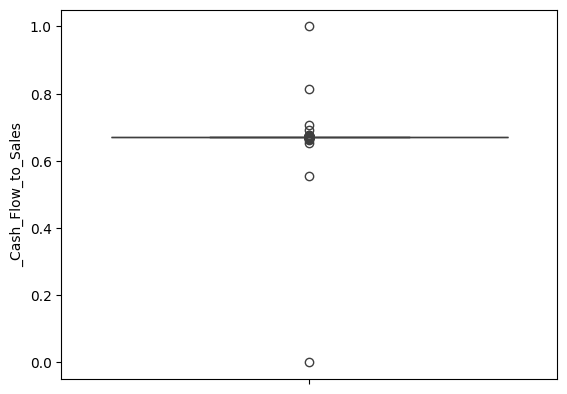

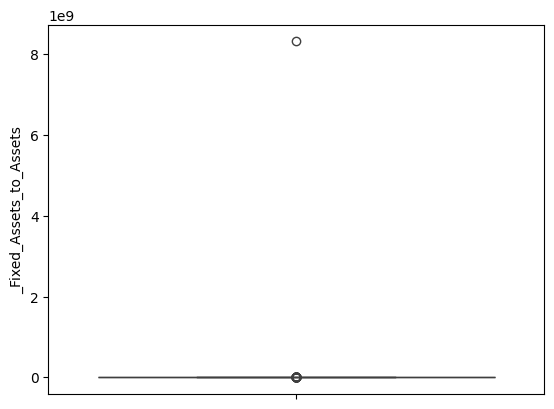

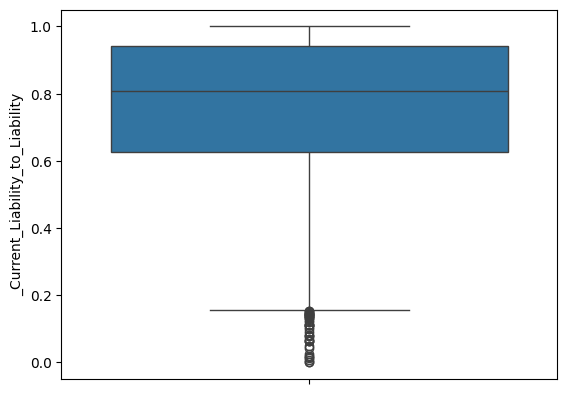

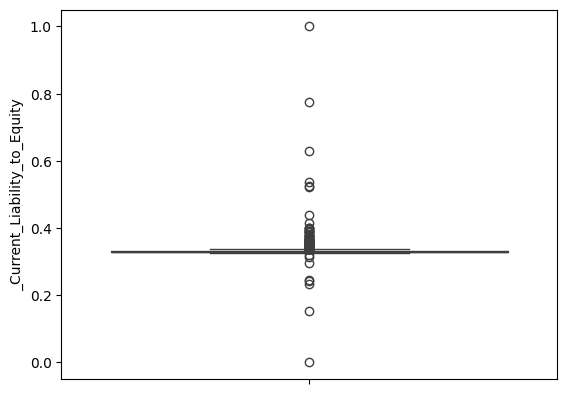

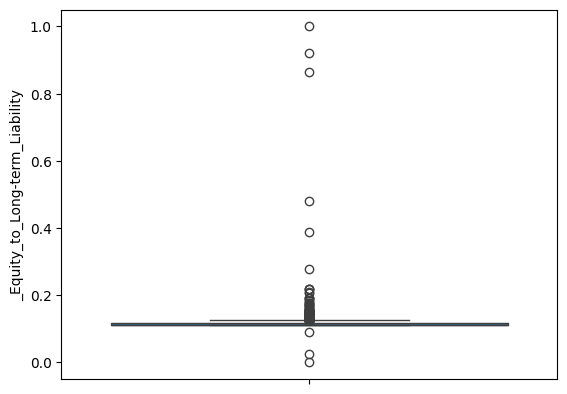

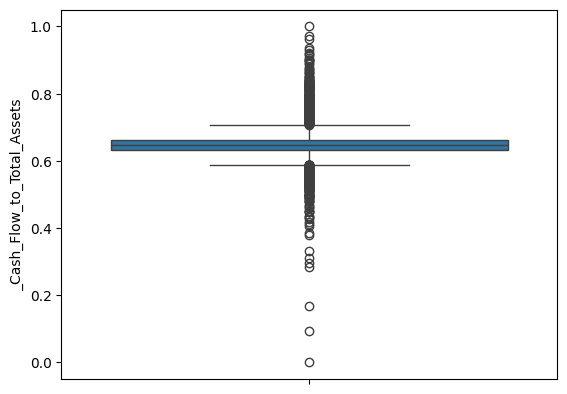

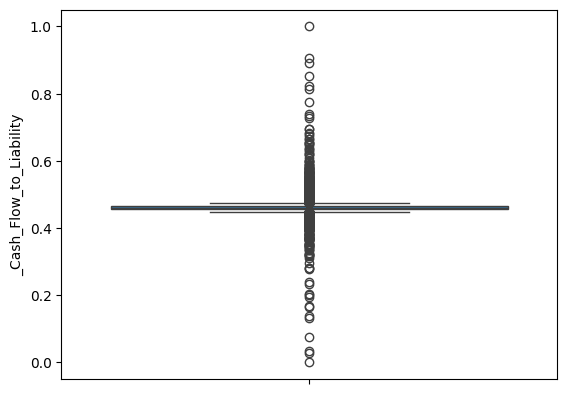

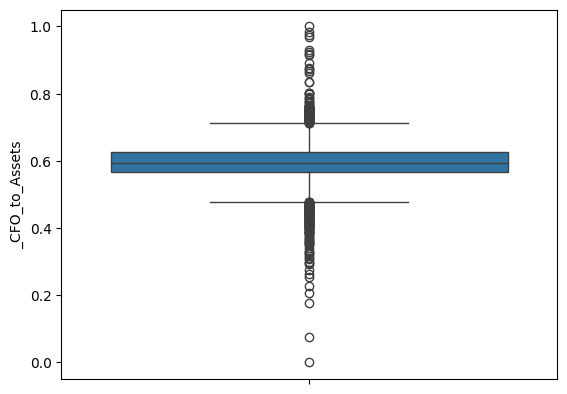

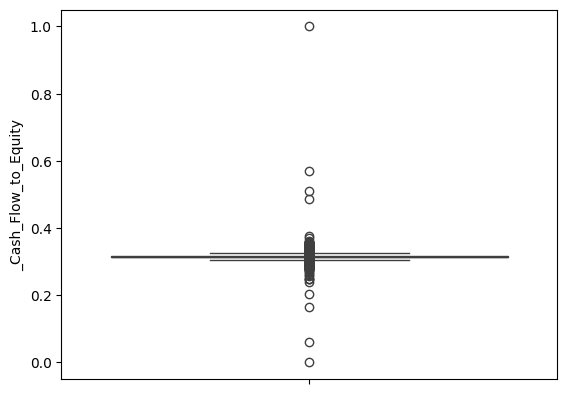

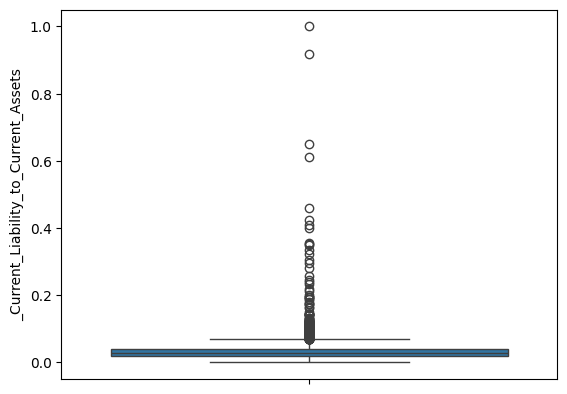

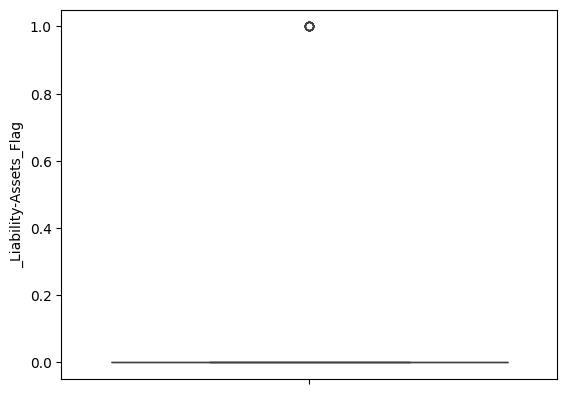

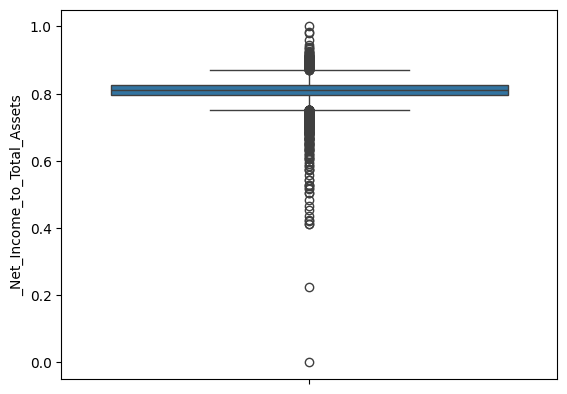

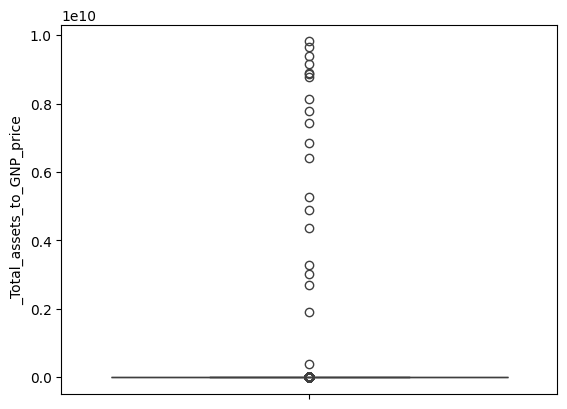

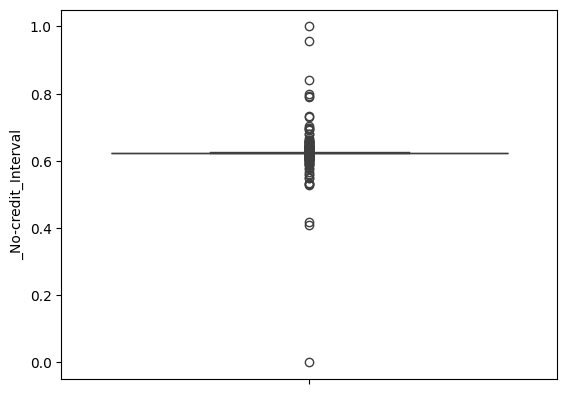

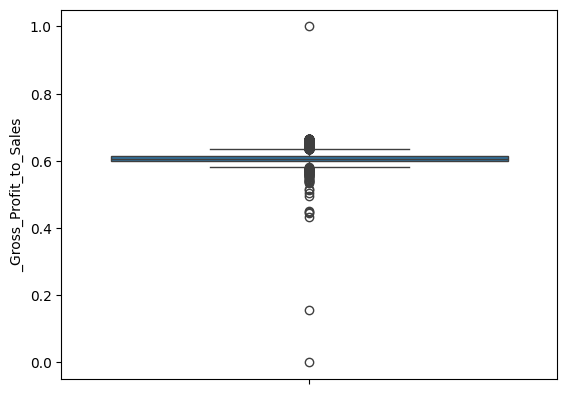

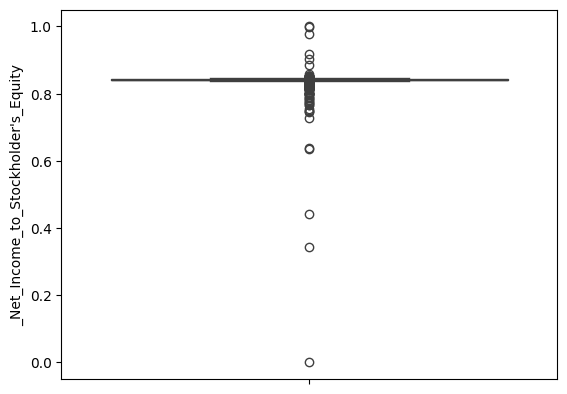

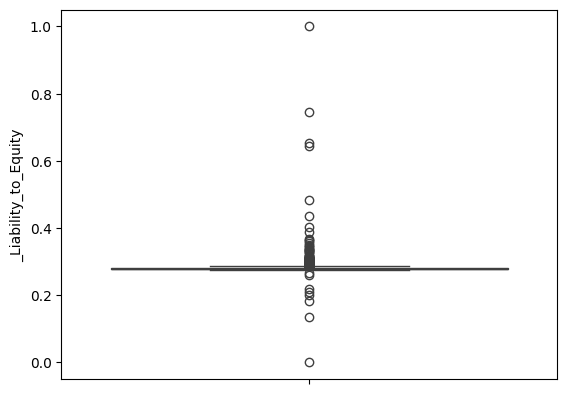

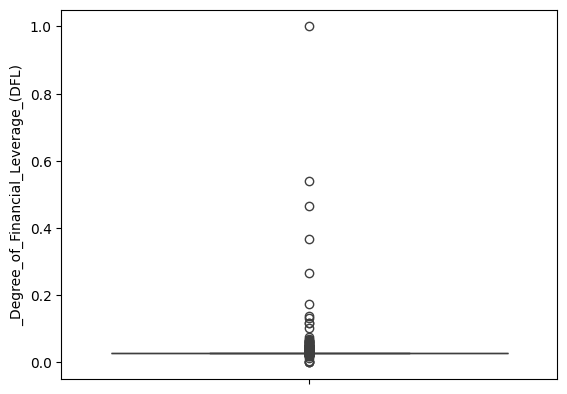

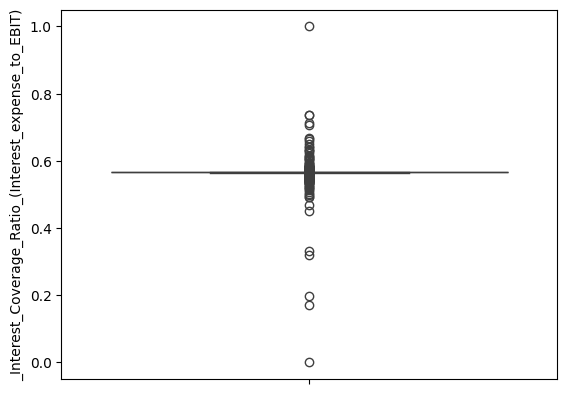

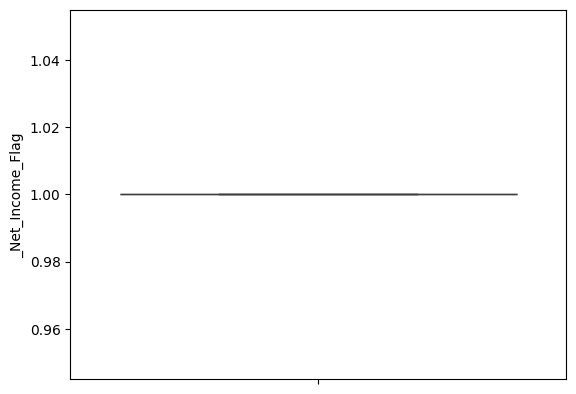

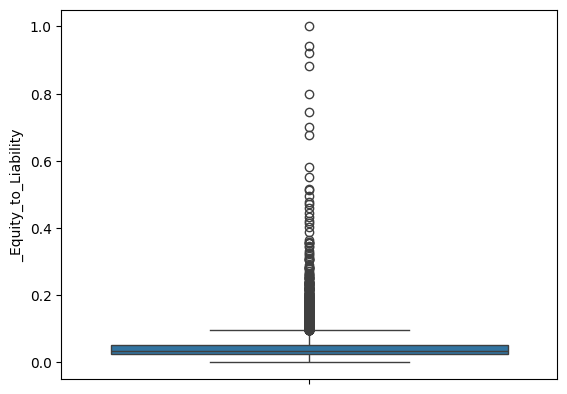

In [ ]:
for i in df.columns:
  if df[i].dtype != 'object':
    sns.boxplot(df[i])
    # plt.xlabel(i)
    plt.show()

Identifying the numerical Features


In [ ]:
# Identify numerical columns, excluding the target 'Bankrupt'
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('Bankrupt')
num_cols


['_ROA(C)_before_interest_and_depreciation_before_interest',
 '_ROA(A)_before_interest_and_%_after_tax',
 '_ROA(B)_before_interest_and_depreciation_after_tax',
 '_Operating_Gross_Margin',
 '_Realized_Sales_Gross_Margin',
 '_Operating_Profit_Rate',
 '_Pre-tax_net_Interest_Rate',
 '_After-tax_net_Interest_Rate',
 '_Non-industry_income_and_expenditure/revenue',
 '_Continuous_interest_rate_(after_tax)',
 '_Operating_Expense_Rate',
 '_Research_and_development_expense_rate',
 '_Cash_flow_rate',
 '_Interest-bearing_debt_interest_rate',
 '_Tax_rate_(A)',
 '_Net_Value_Per_Share_(B)',
 '_Net_Value_Per_Share_(A)',
 '_Net_Value_Per_Share_(C)',
 '_Persistent_EPS_in_the_Last_Four_Seasons',
 '_Cash_Flow_Per_Share',
 '_Revenue_Per_Share_(Yuan_¥)',
 '_Operating_Profit_Per_Share_(Yuan_¥)',
 '_Per_Share_Net_profit_before_tax_(Yuan_¥)',
 '_Realized_Sales_Gross_Profit_Growth_Rate',
 '_Operating_Profit_Growth_Rate',
 '_After-tax_Net_Profit_Growth_Rate',
 '_Regular_Net_Profit_Growth_Rate',
 '_Continuous_Net_

# Outlier Removal by using Mask

In [ ]:
# Create a boolean mask for rows that are NOT outliers in any numerical column
# Initialize the mask as True for all rows
mask = pd.Series(True, index=df.index)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + (1.5 * IQR)
    LL = Q1 - (1.5 * IQR)
    # Create a mask for this specific column
    # True means the value is within the bounds for this column
    col_mask = (df[col] >= LL) & (df[col] <= UL)
    # Combine the column mask with the overall mask using AND
    mask = mask & col_mask
    mask

In [ ]:
# Filter the DataFrame using the combined mask
df_cleaned = df[mask].copy()
df_cleaned.shape

(458, 96)

this df_cleaned is the filtered dataframe after removal of outlier without any NAN value

In [ ]:
df=df_cleaned

Checking each Features after Removal of Outlier

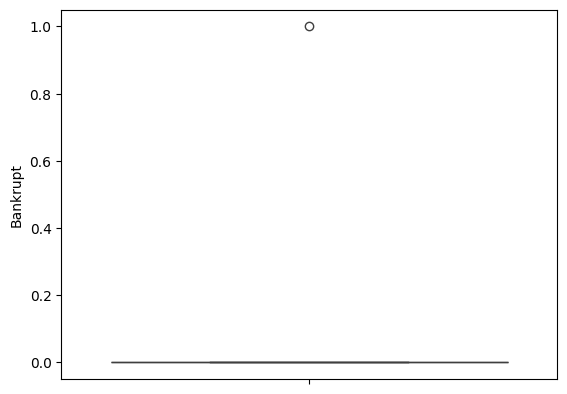

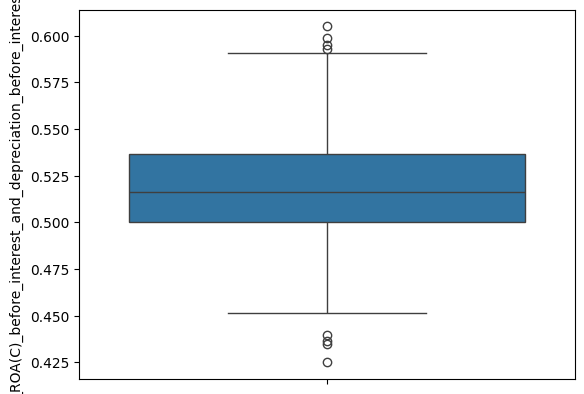

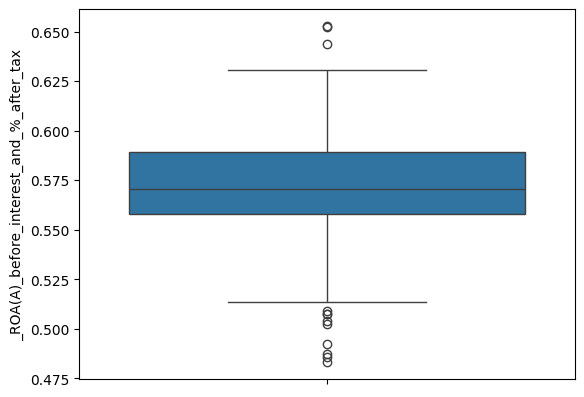

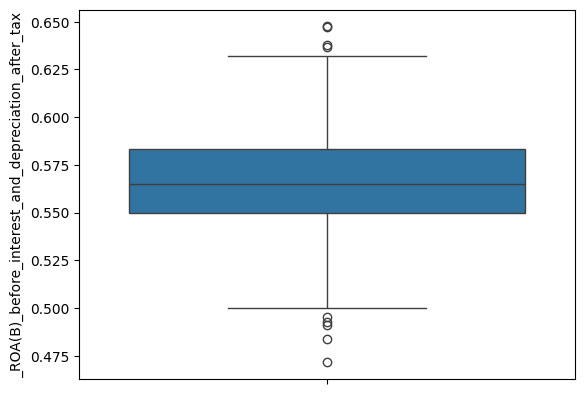

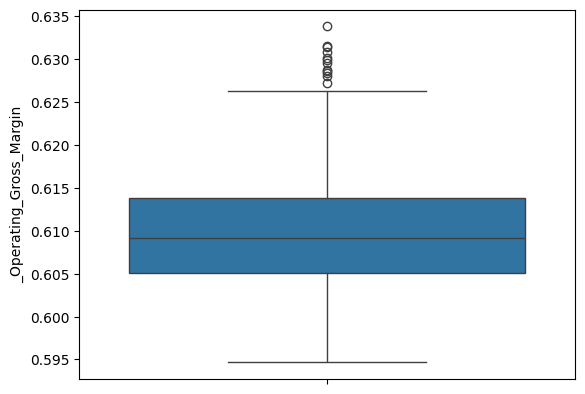

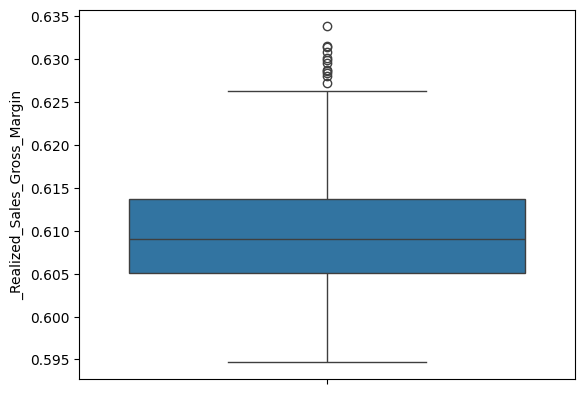

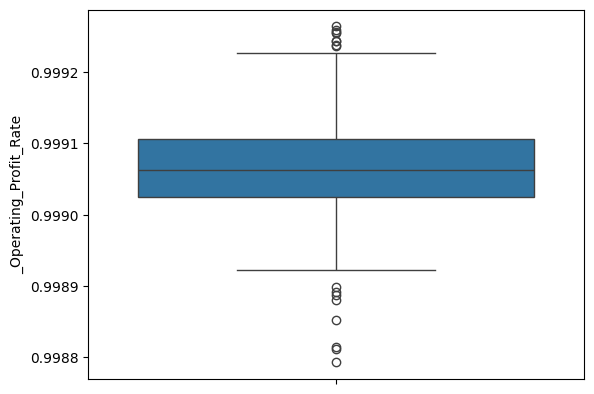

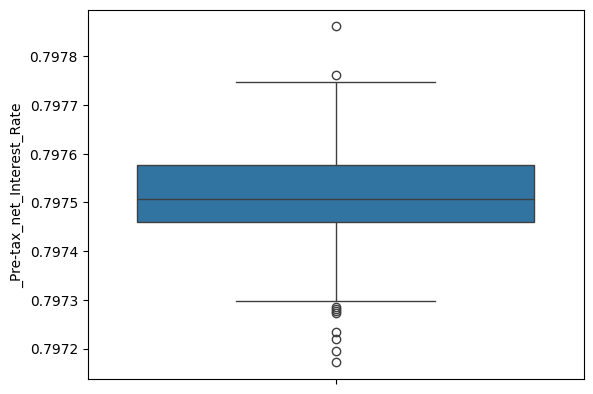

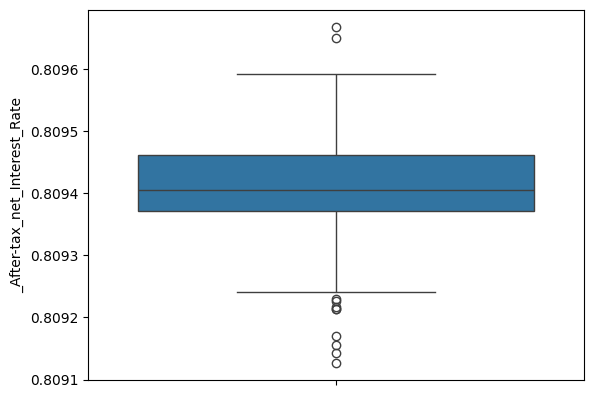

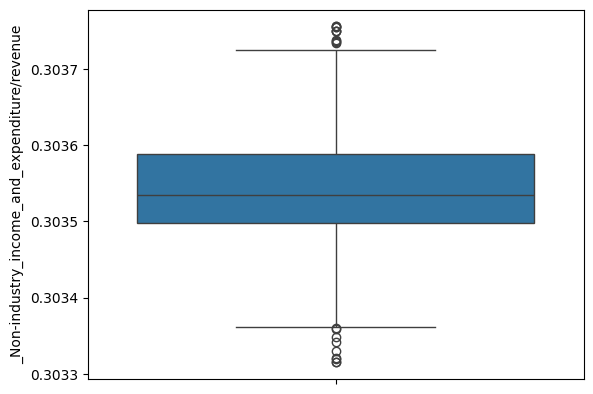

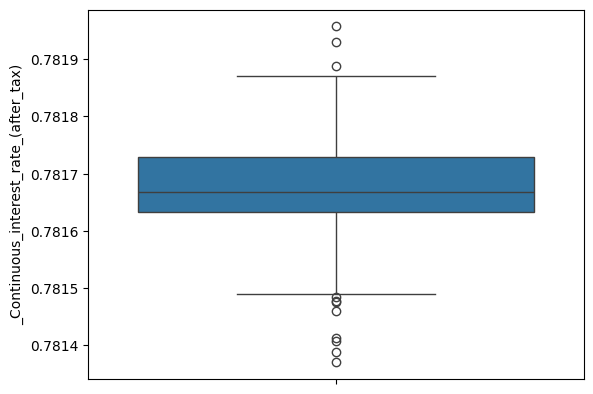

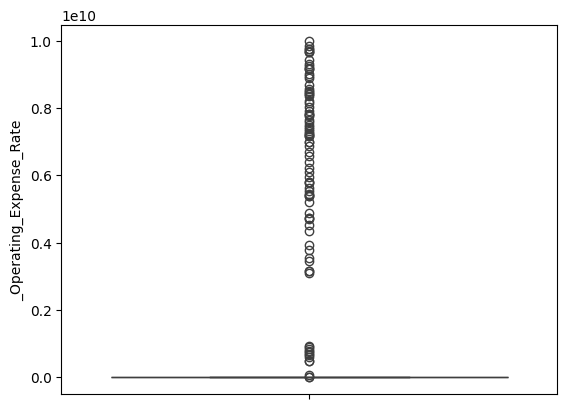

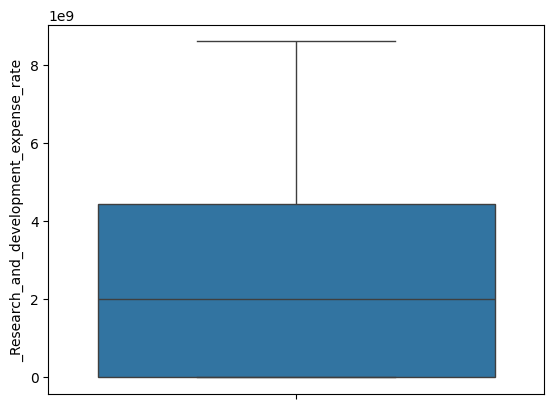

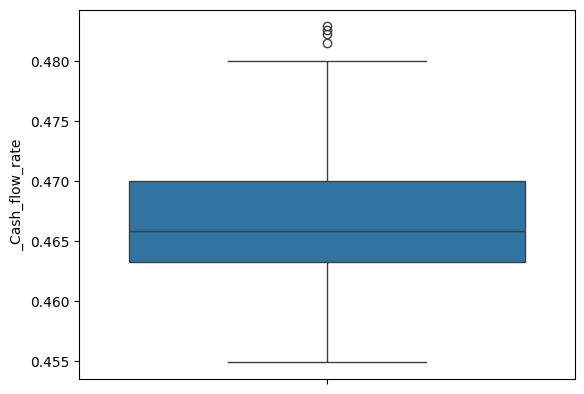

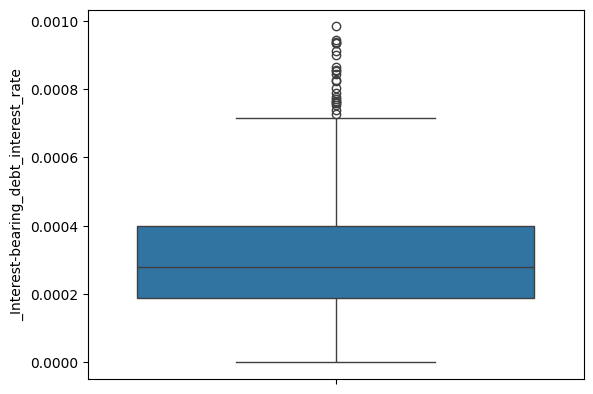

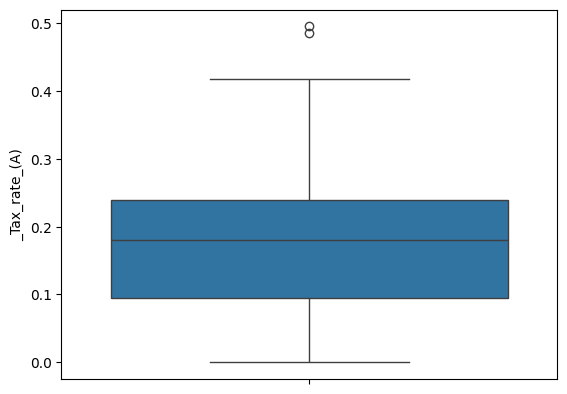

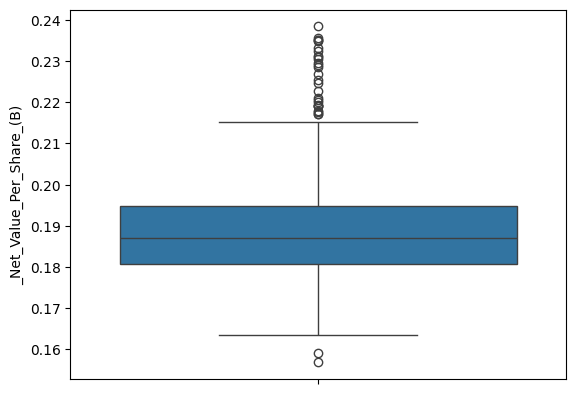

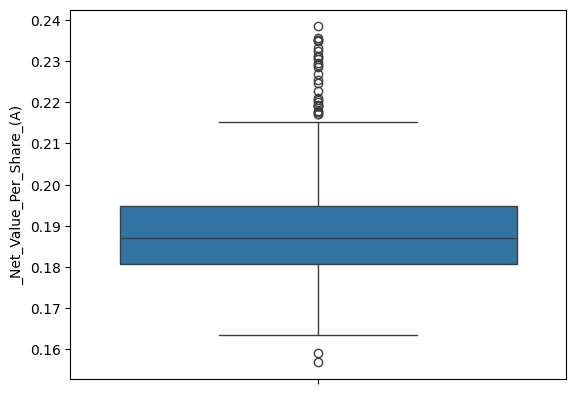

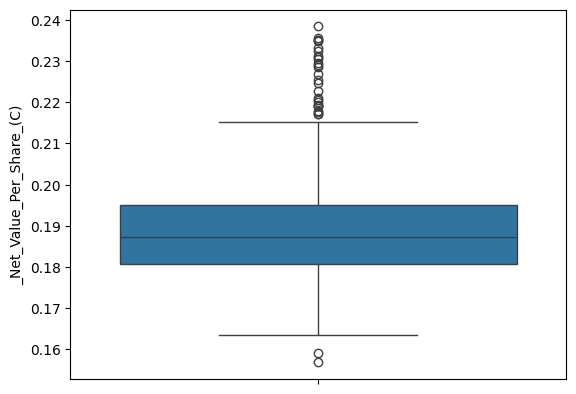

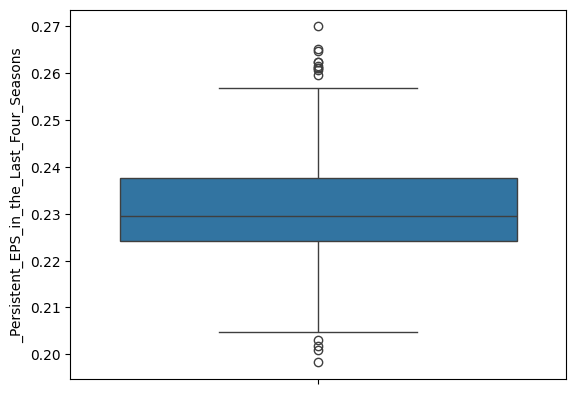

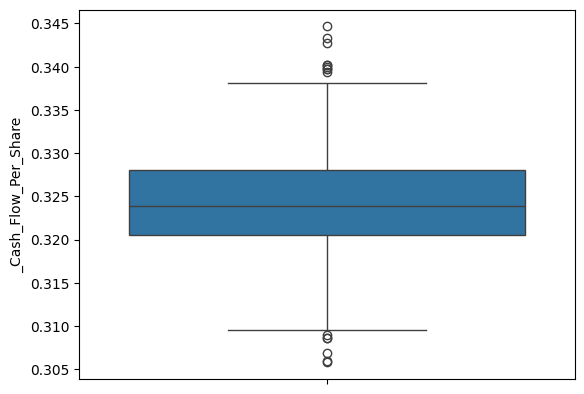

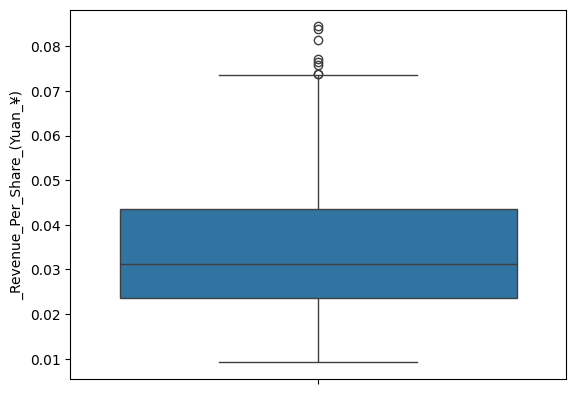

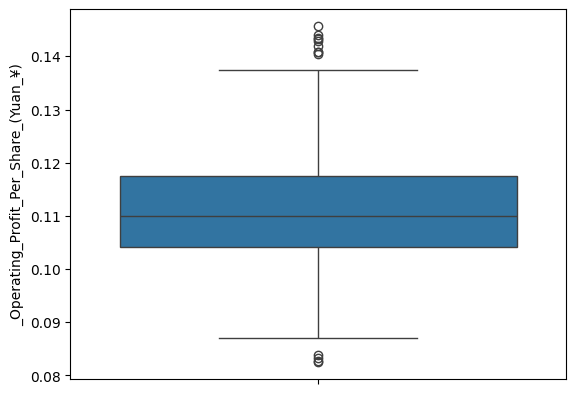

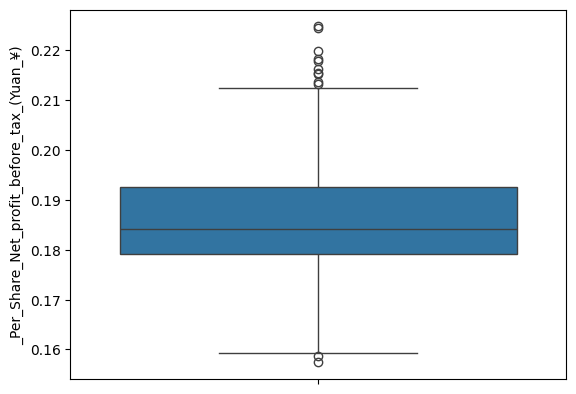

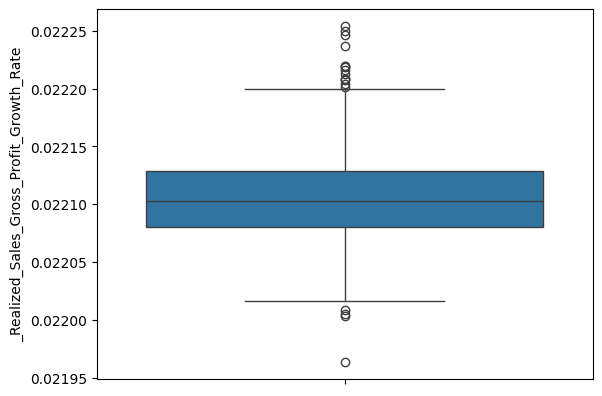

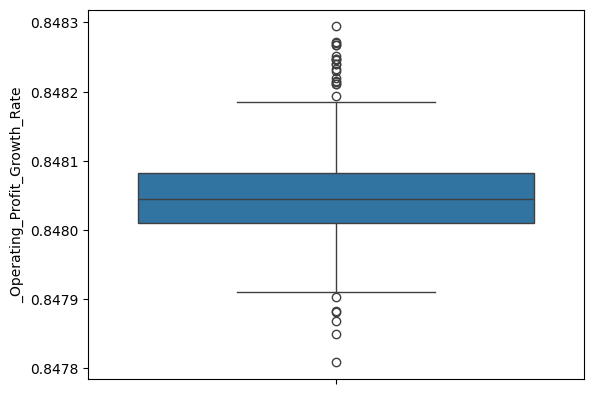

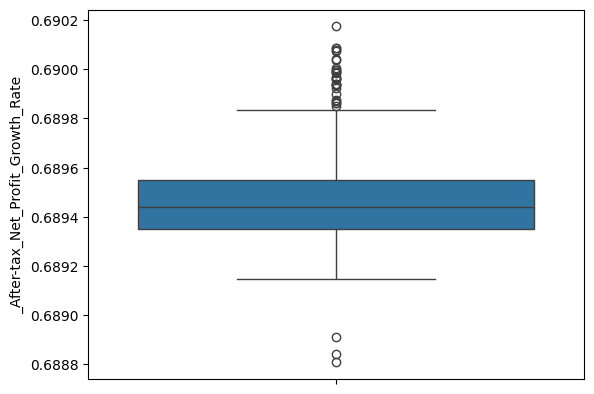

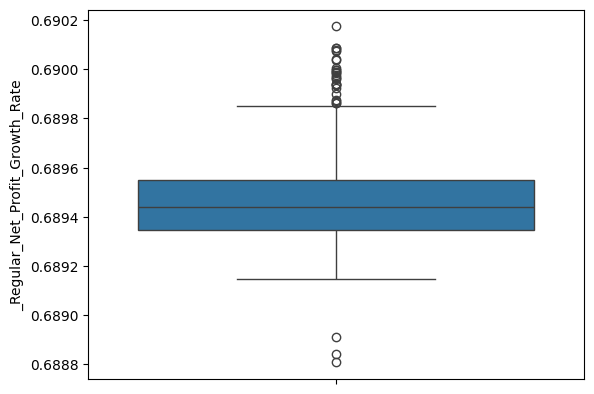

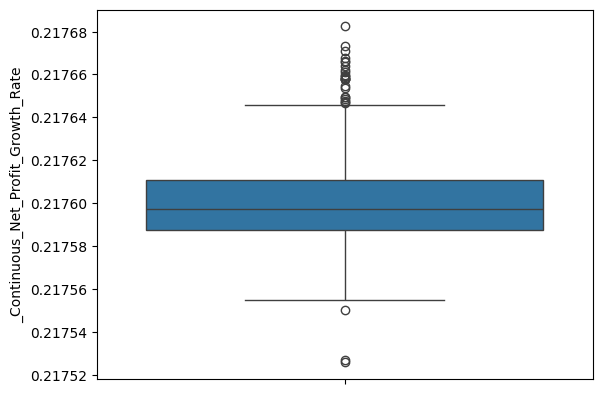

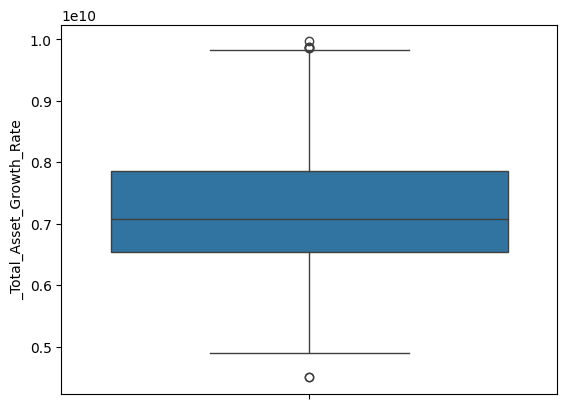

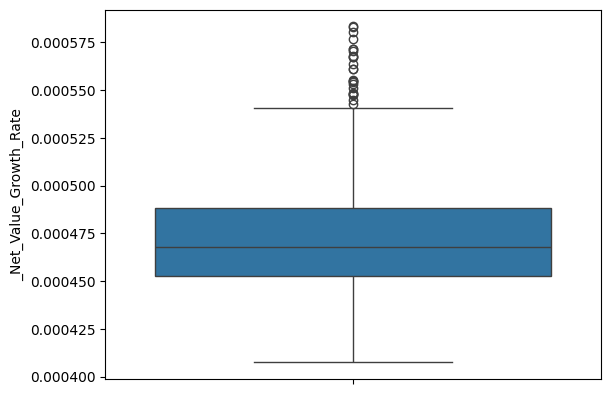

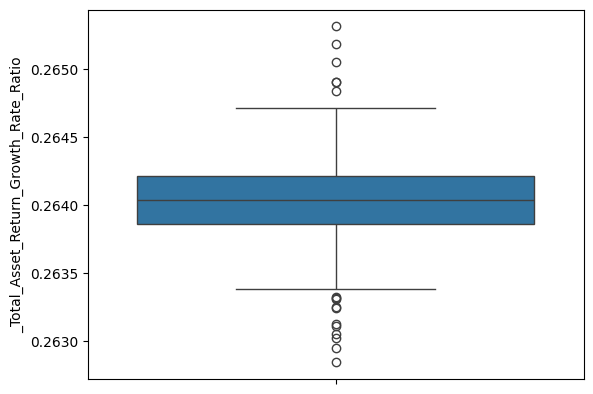

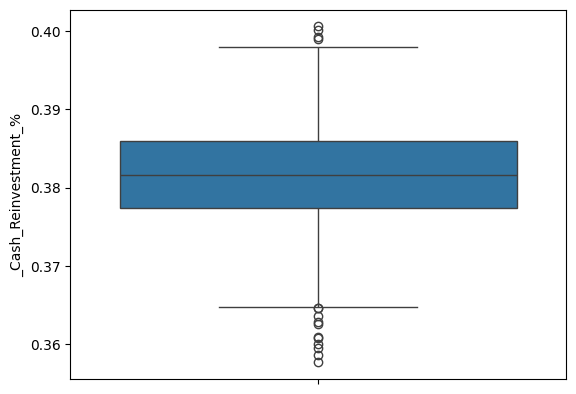

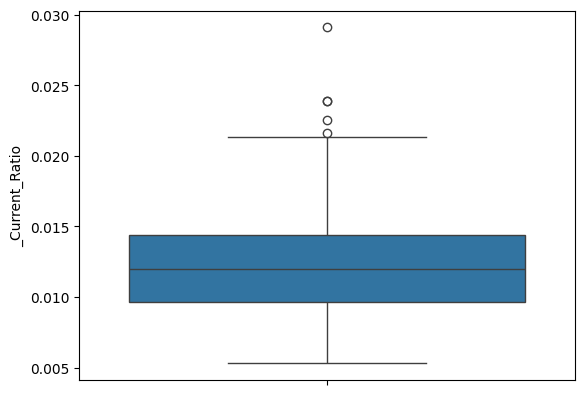

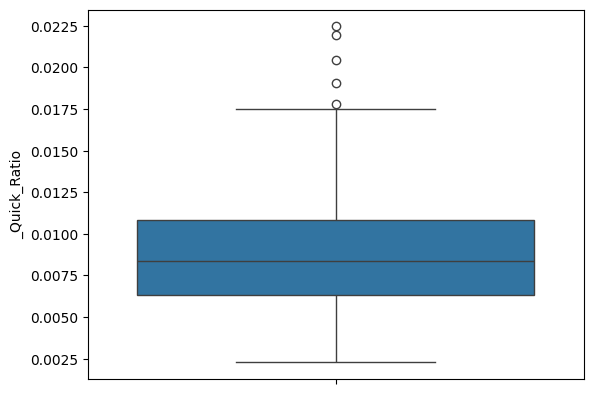

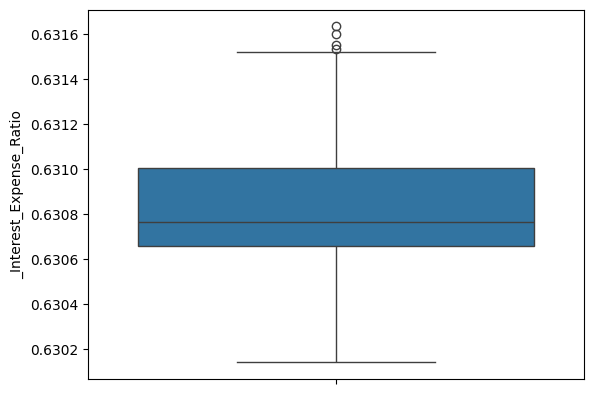

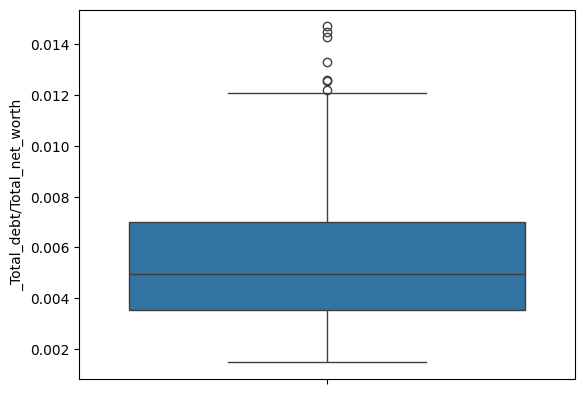

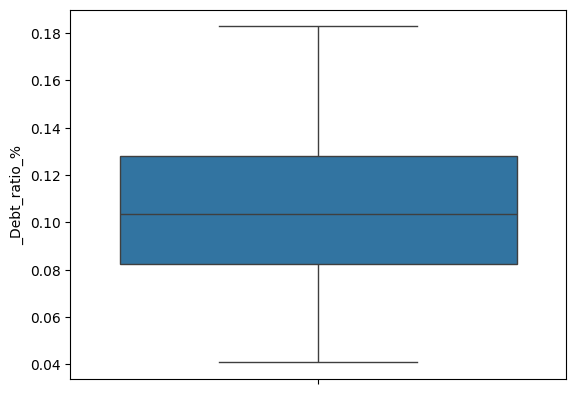

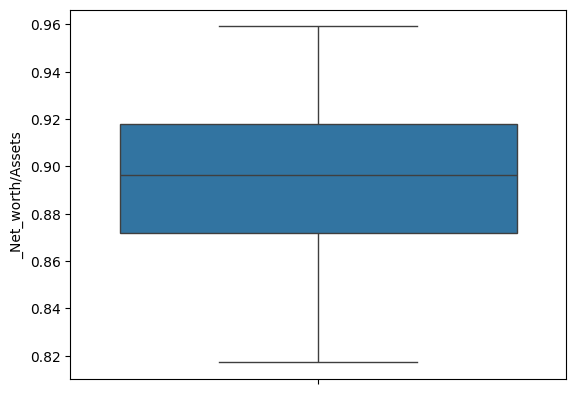

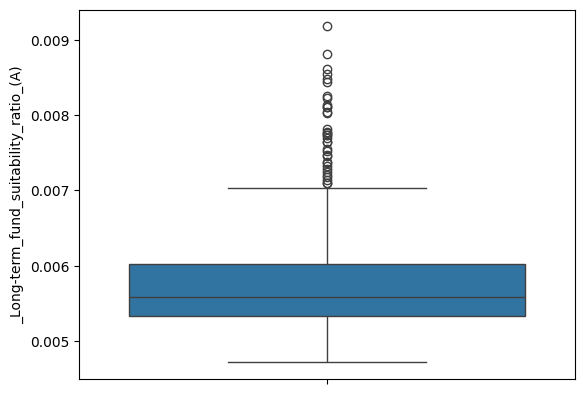

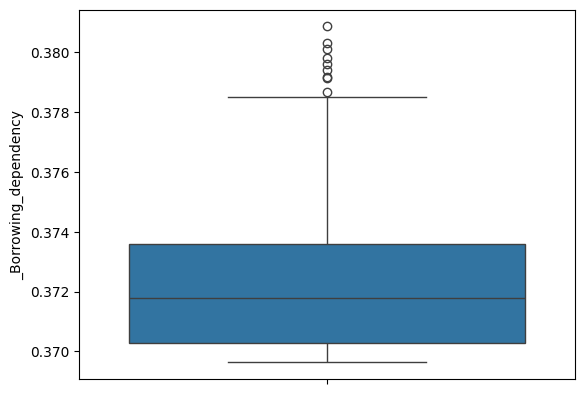

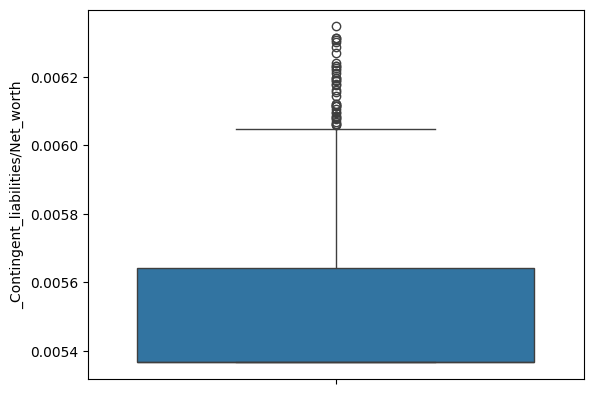

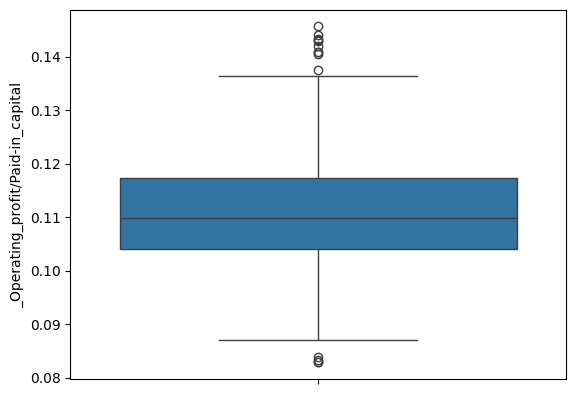

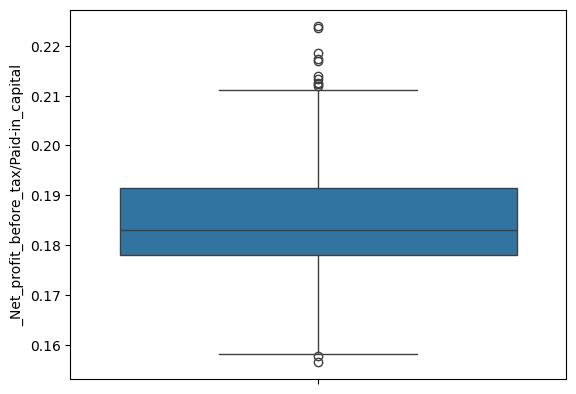

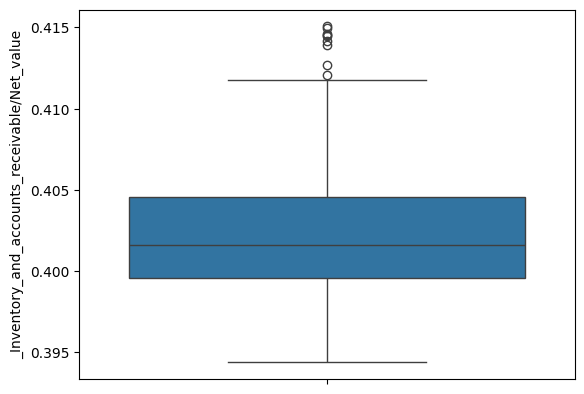

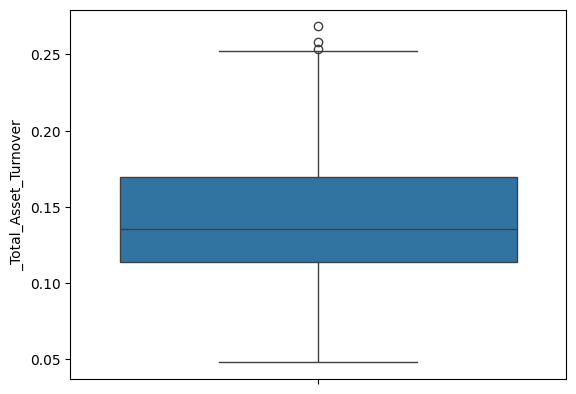

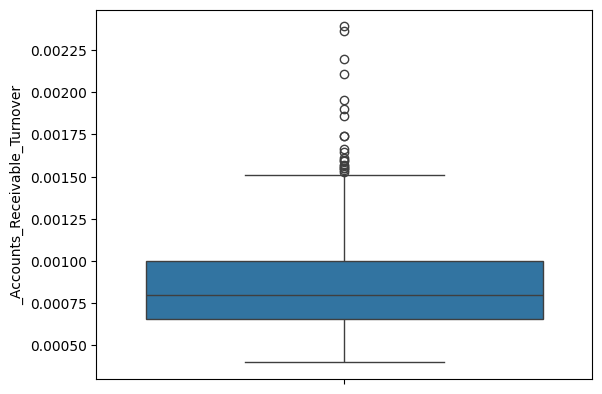

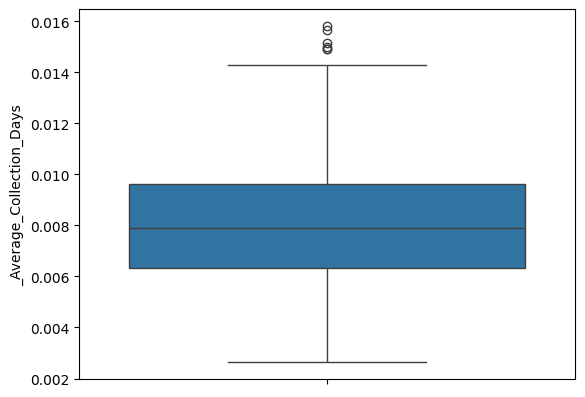

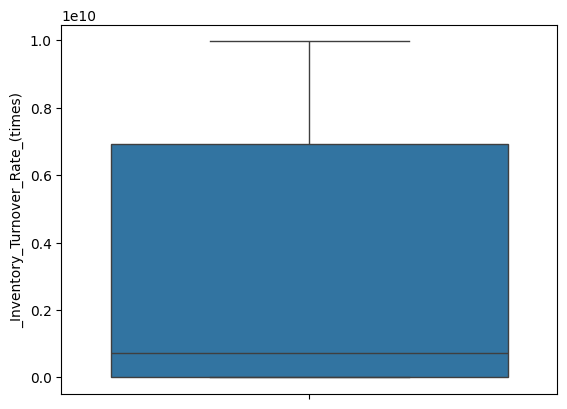

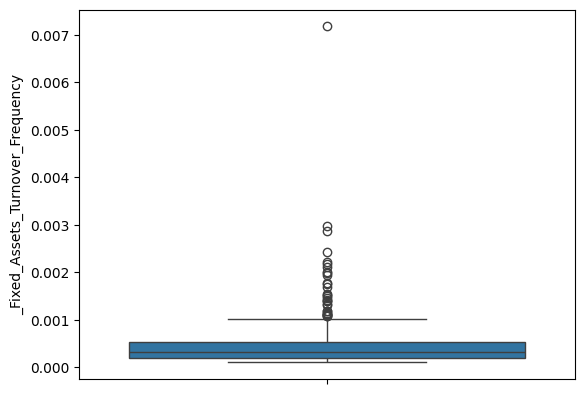

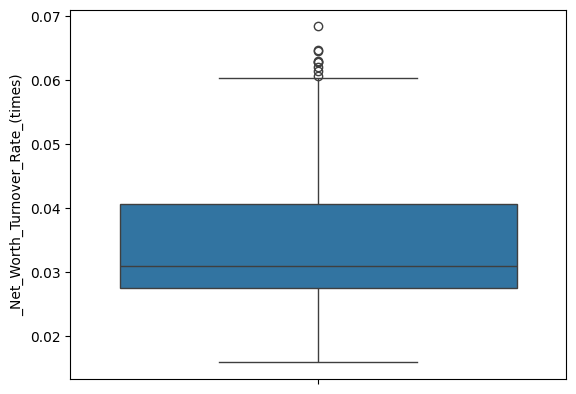

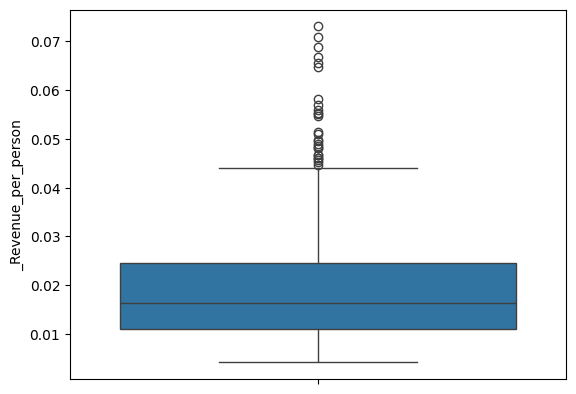

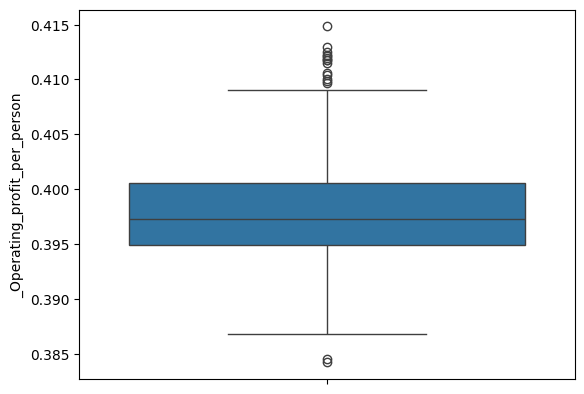

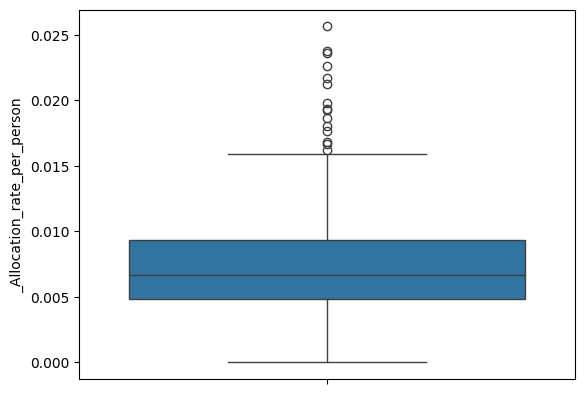

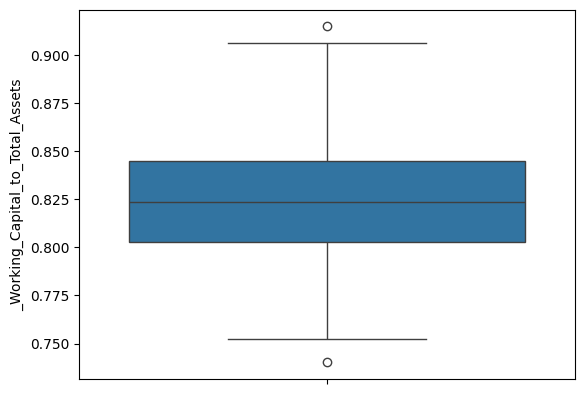

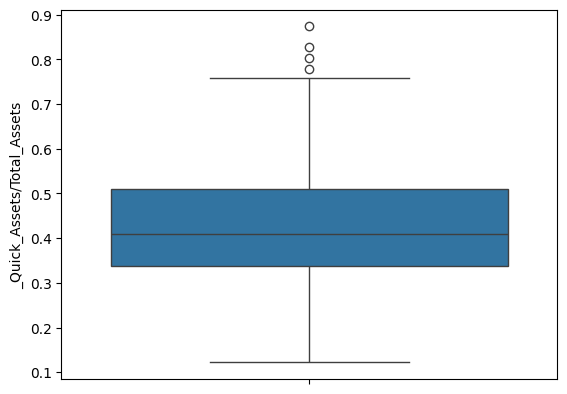

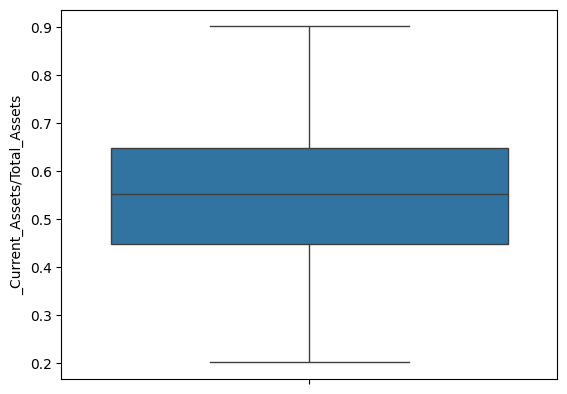

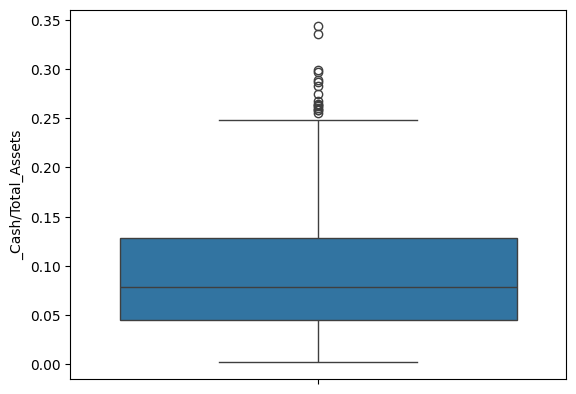

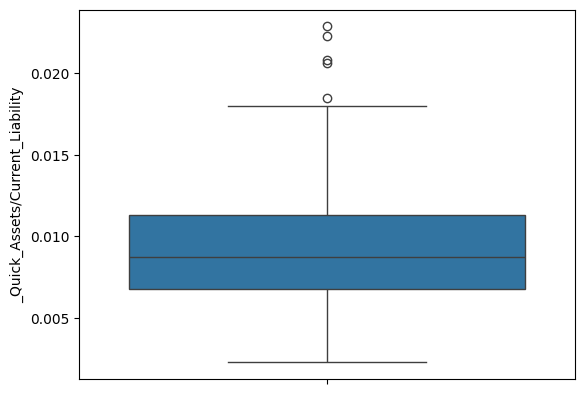

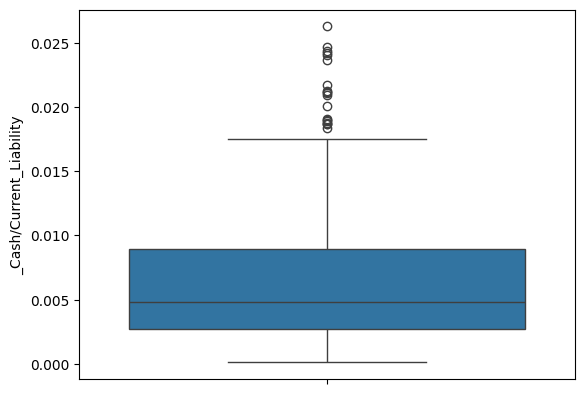

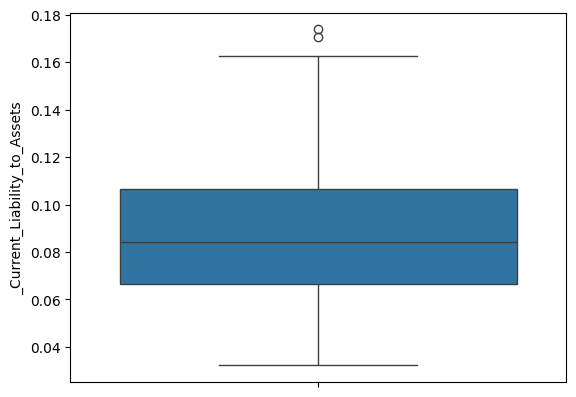

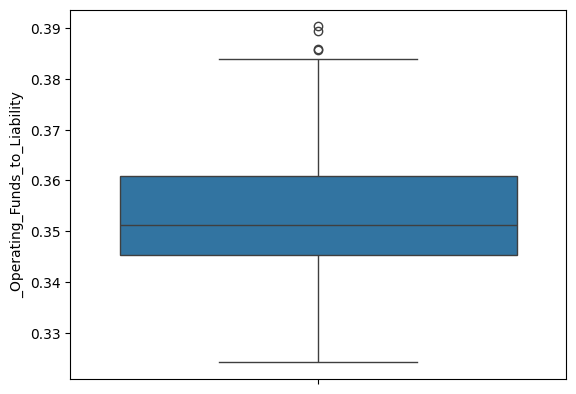

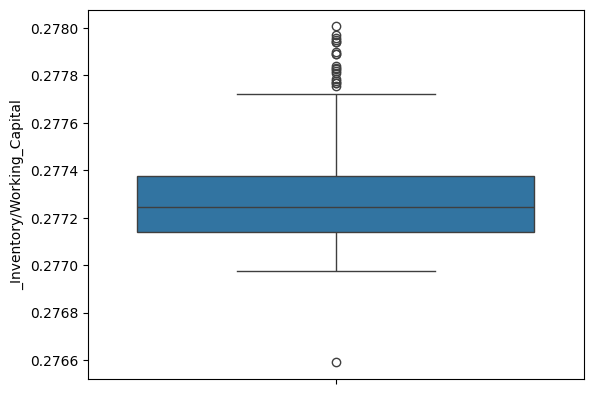

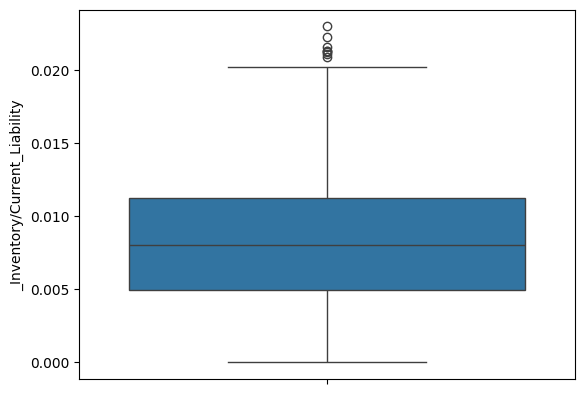

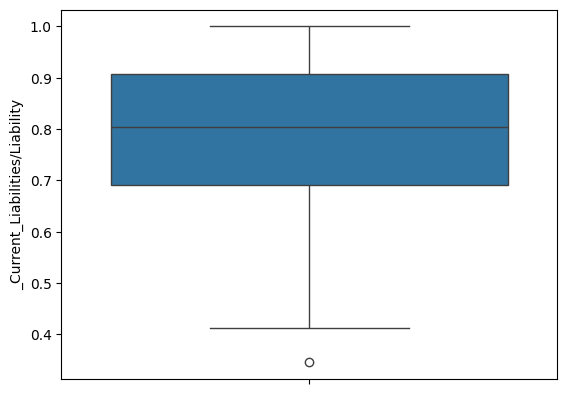

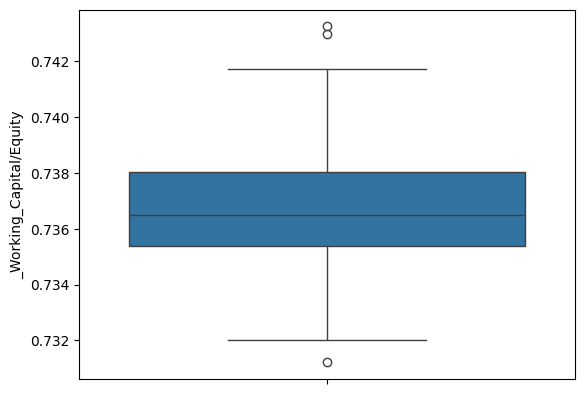

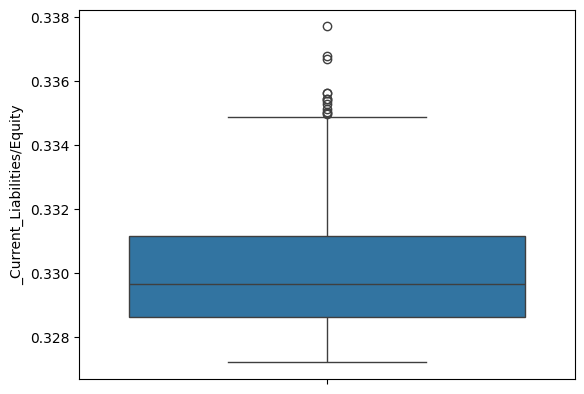

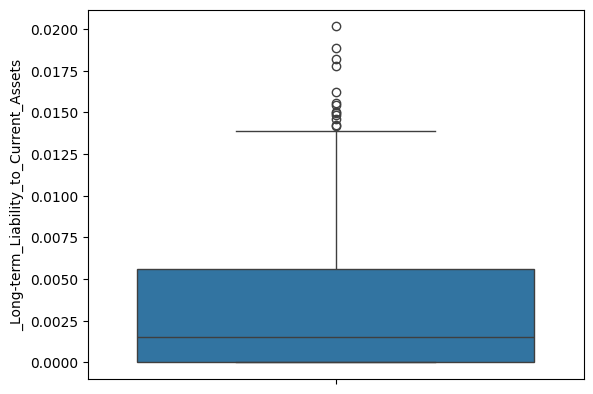

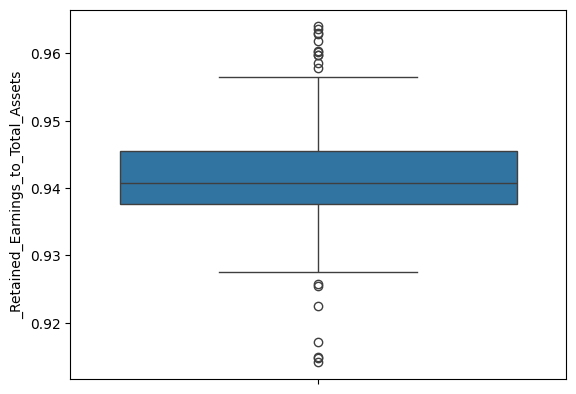

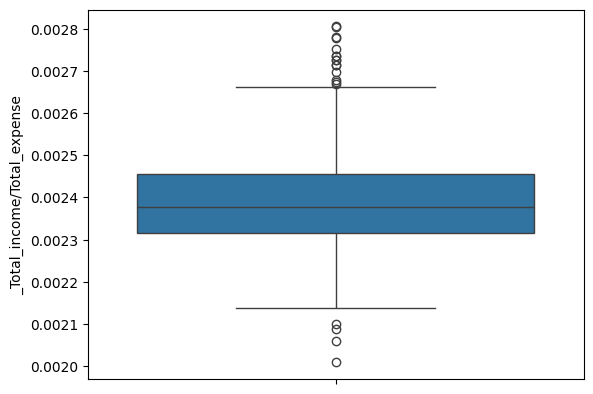

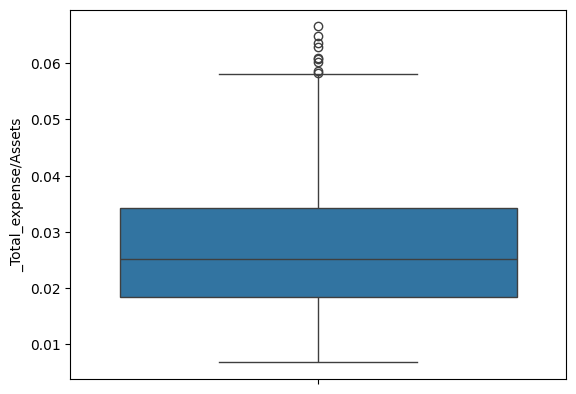

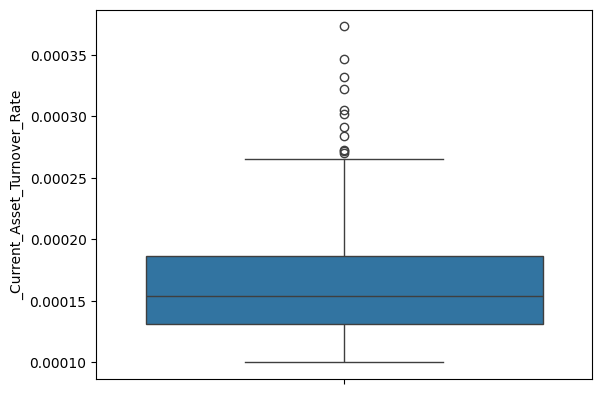

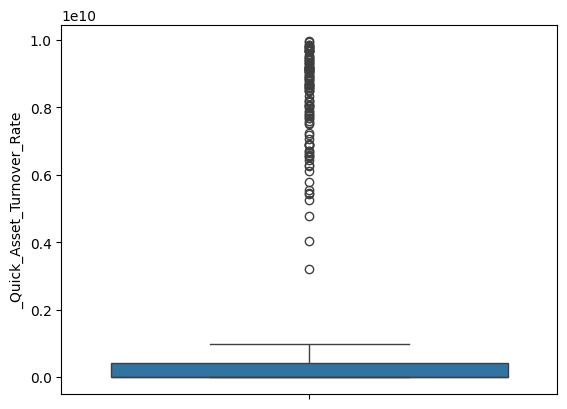

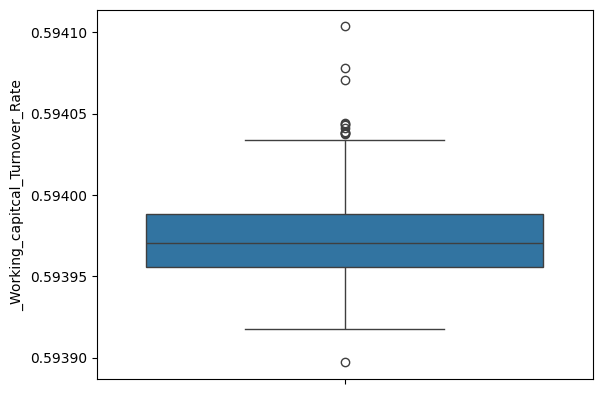

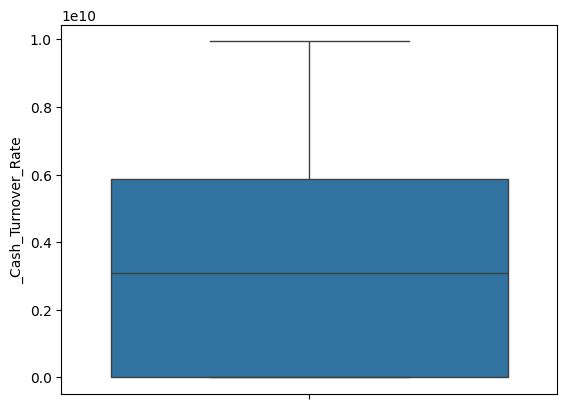

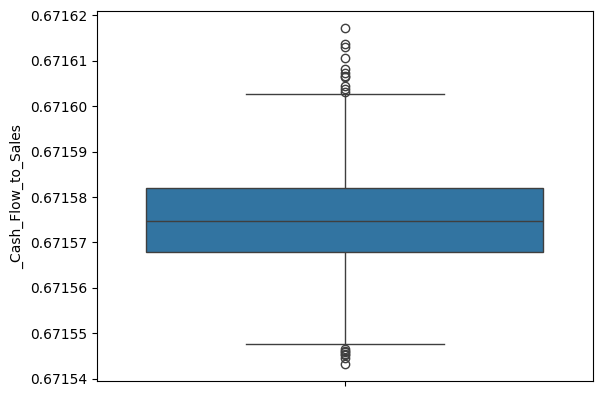

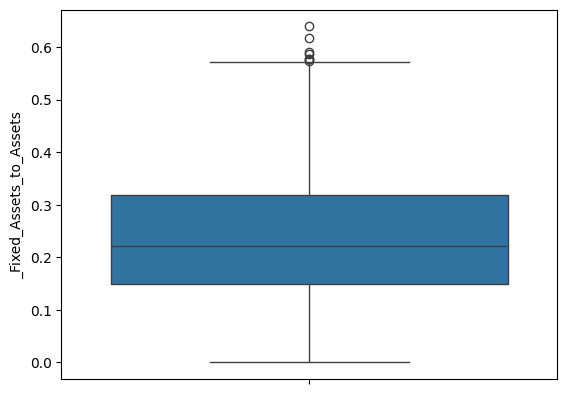

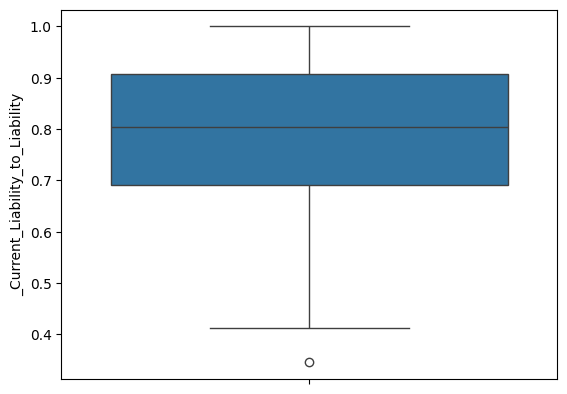

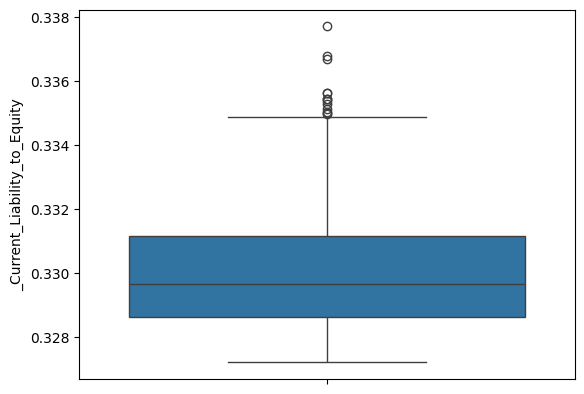

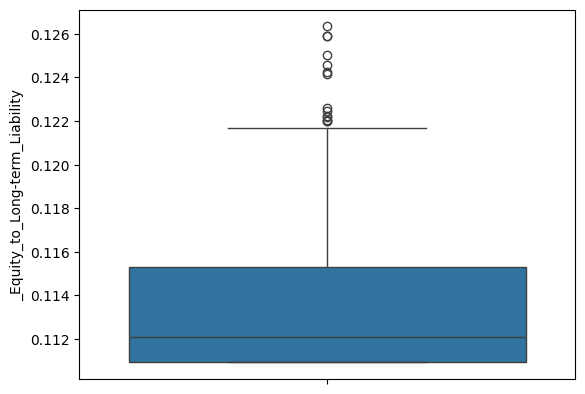

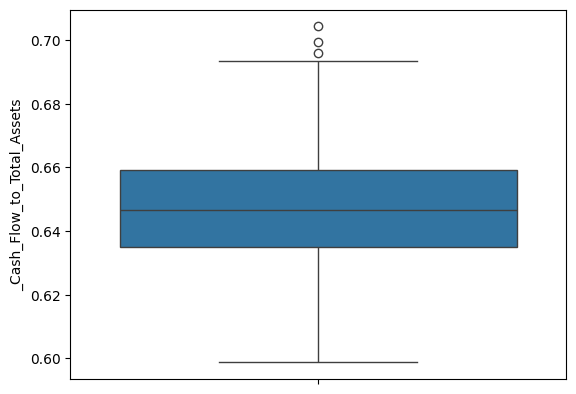

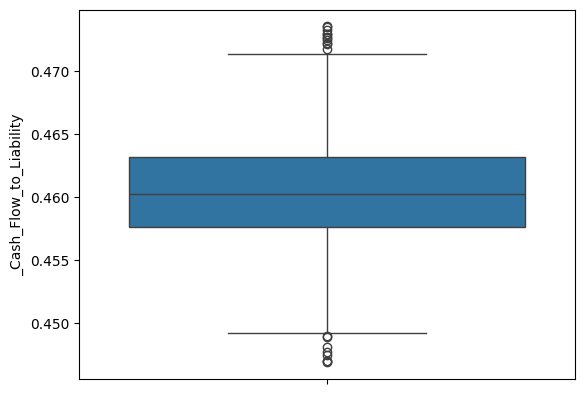

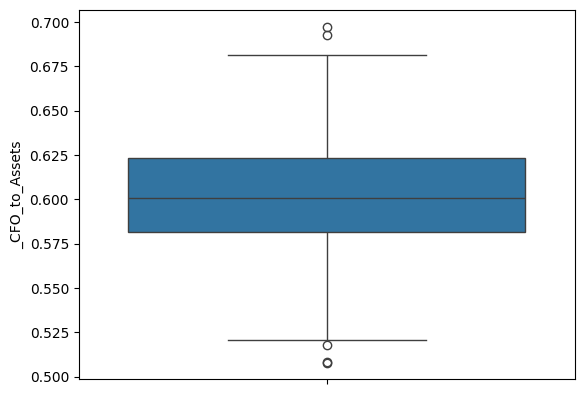

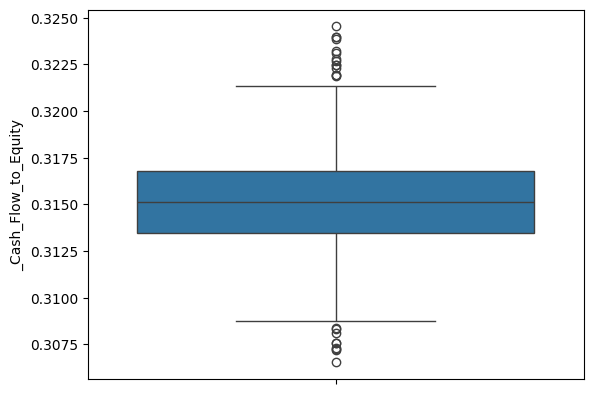

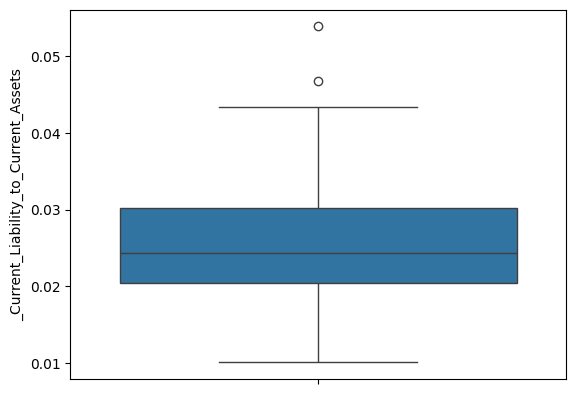

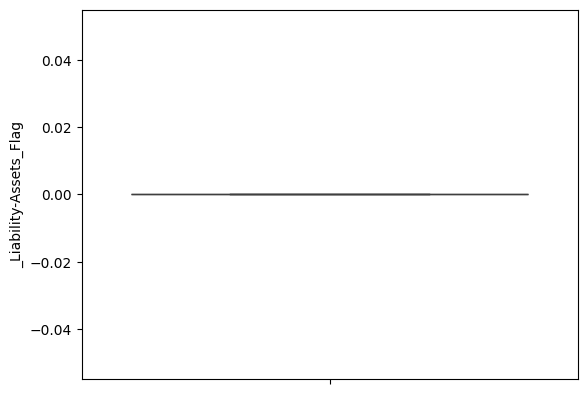

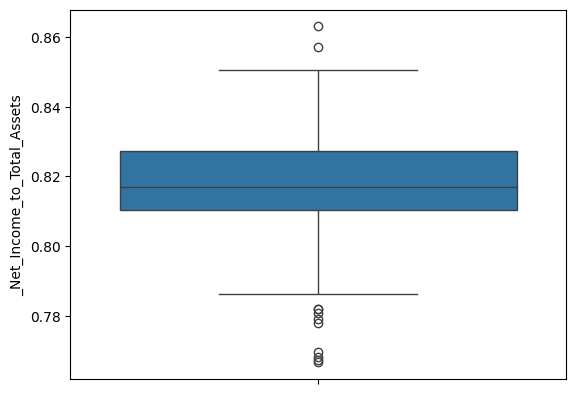

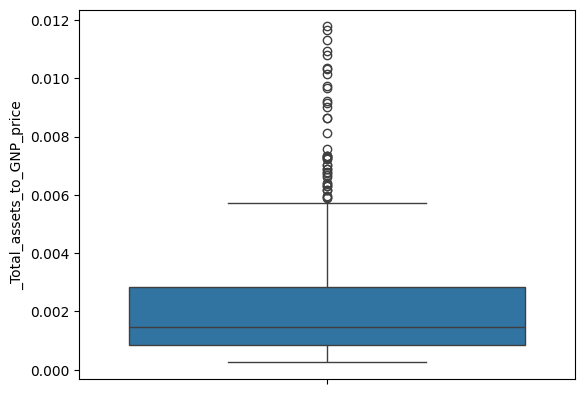

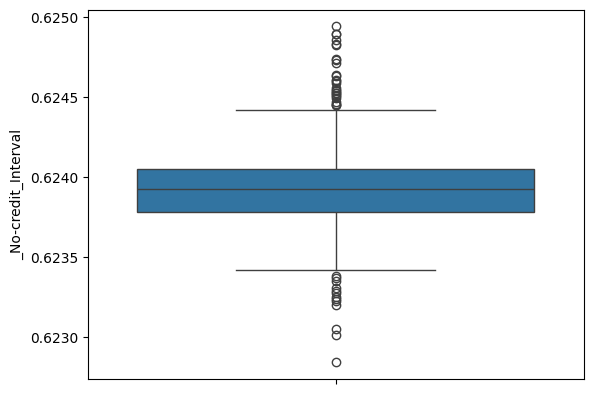

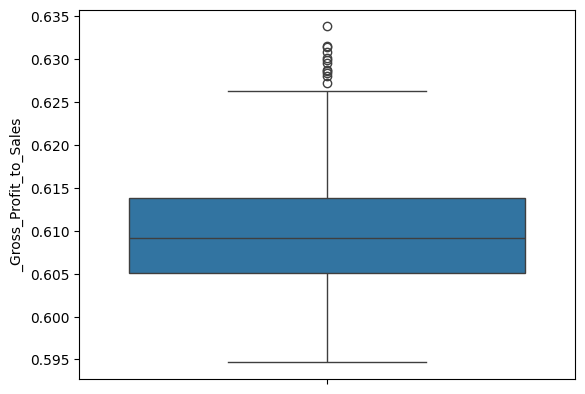

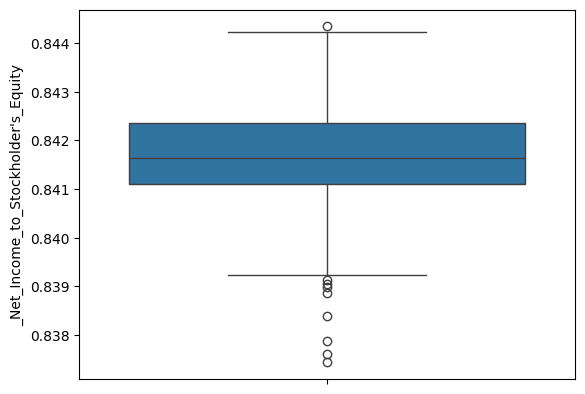

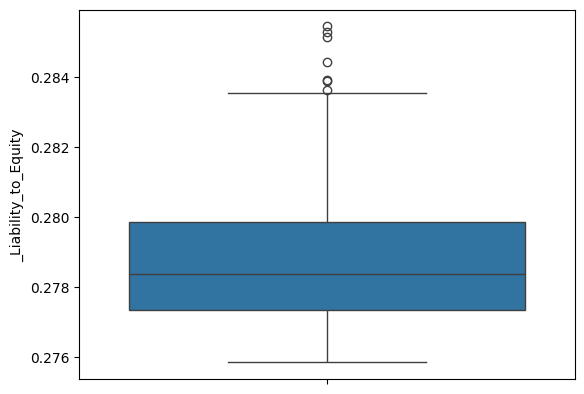

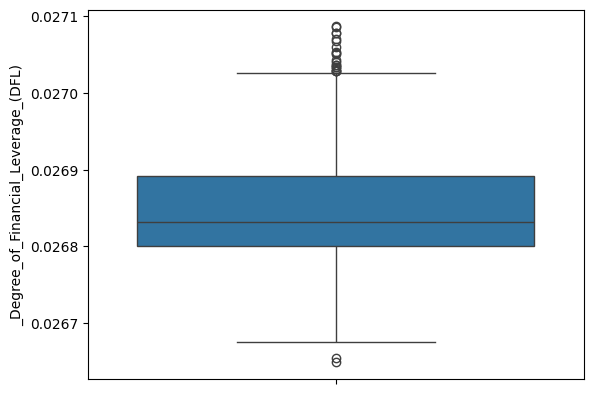

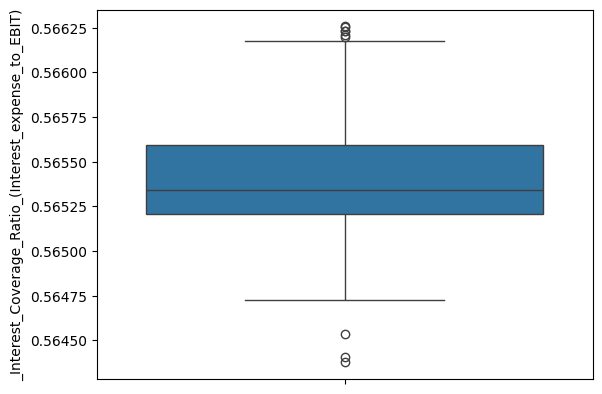

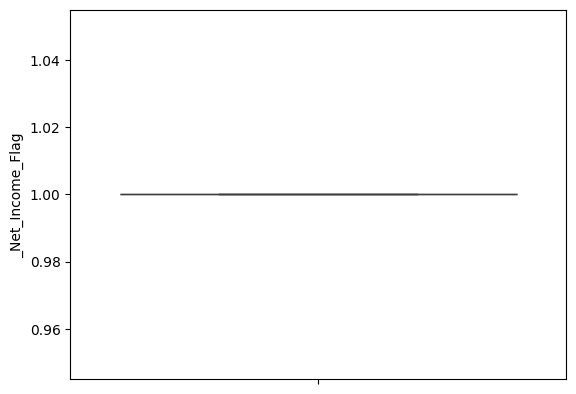

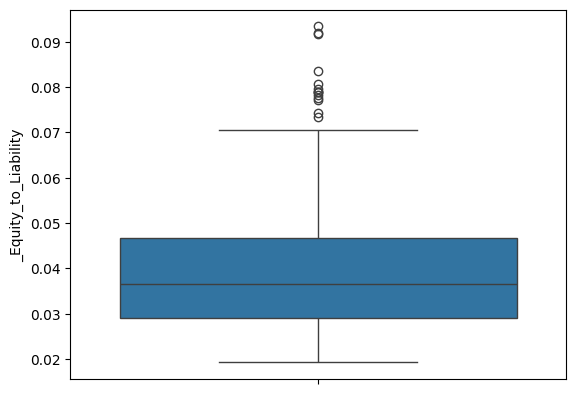

In [ ]:
for i in df.columns:
     if df[i].dtype != 'object' and i != 'Date':
      sns.boxplot(df[i])
    # plt.xlabel(i)
     plt.show()

Rechecking the null value

In [ ]:
df.isna().sum().sum()

np.int64(0)

# **Visualization**

Text(0.5, 1.0, 'Class balance')

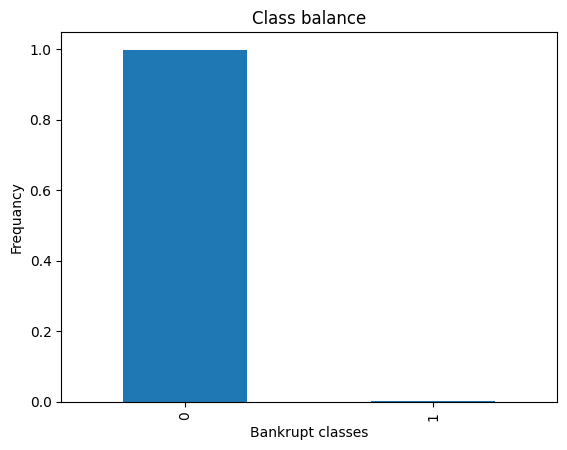

In [ ]:
df['Bankrupt'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance")

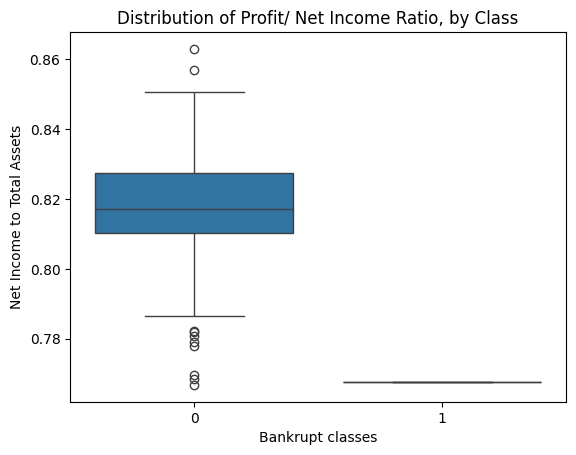

In [ ]:
sns.boxplot(x="Bankrupt" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

Text(0.5, 1.0, 'Distrbution of Net Income to Total Assets Ratio')

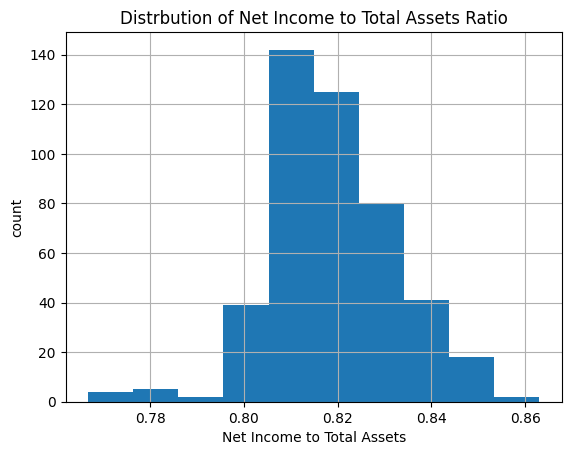

In [ ]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio")

# **Q2)Devise strategies that can be formed for the business problem**
These focus on building the best possible predictive model, especially considering the imbalanced nature of the data.The strategies in this context should be

a)**Handling Class Imbalance:**
   Finding the actual cost:Determining the FN then FP as in this case FN(missing out Bankrucy) will be more costly for investors or creditors.

   Sampling Techniques: We can use different techniques like over sampling, undersampling like SMOT or Hybrid one.

**b)Choosing Appropriate Evaluation Metrics**: Focus on metrics relevant to the minority class (bankruptcy) like:

    Recall(Sensitivity)
    Precision
    F1-Score
    AUC-ROC
   Confusion Matrix: Examine the confusion matrix to understand the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

**c)Model Selection and Tuning:**

**d)Feature Importance:** Understand which features (financial ratios) the model considers most important for predicting bankruptcy.


# X--Independent Variable
# Y--Dependent Variable

In [ ]:
X = df.drop(columns=['Bankrupt'])
y = df['Bankrupt']
print(X.shape, y.shape)

(458, 95) (458,)


# **Q3)Feature engineer data according to the business requirements**
**Feature Engineering or Feature Selection**

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2,k = 8)
x_new = selector.fit_transform(X,y)

In [ ]:
print(x_new)
print(x_new.shape)

[[1.68713645e-04 0.00000000e+00 5.87103958e-03 ... 9.84000000e+09
  1.05229703e-04 3.23861363e-01]
 [2.48734098e-04 0.00000000e+00 2.17430914e-01 ... 7.55000000e+09
  1.24000000e+09 2.12349965e-01]
 [1.60966000e-04 1.19000000e+09 2.08928029e-01 ... 1.11244672e-04
  8.81000000e+09 2.82147476e-01]
 ...
 [1.05344846e-04 4.28000000e+08 1.05172588e-01 ... 4.05000000e+09
  2.71000000e+09 1.11866832e-01]
 [1.32056876e-04 2.19000000e+09 1.60643790e-01 ... 9.07000000e+09
  8.96000000e+09 1.81265657e-01]
 [1.11357944e-04 3.75000000e+09 1.82710801e-01 ... 1.42777821e-04
  9.53000000e+09 1.27181395e-01]]
(458, 8)


In [ ]:
select_feature = X.columns[selector.get_support()]
select_feature

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Tax_rate_(A)', '_Total_Asset_Growth_Rate',
       '_Inventory_Turnover_Rate_(times)', '_Quick_Asset_Turnover_Rate',
       '_Cash_Turnover_Rate', '_Fixed_Assets_to_Assets'],
      dtype='object')

In [ ]:
x_update = df[select_feature]
x_update

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Tax_rate_(A),_Total_Asset_Growth_Rate,_Inventory_Turnover_Rate_(times),_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets
8,0.000169,0.000000e+00,0.005871,6.890000e+09,3.041883e-04,9.840000e+09,1.052297e-04,0.323861
17,0.000249,0.000000e+00,0.217431,6.960000e+09,6.900000e+09,7.550000e+09,1.240000e+09,0.212350
21,0.000161,1.190000e+09,0.208928,6.560000e+09,1.561067e-04,1.112447e-04,8.810000e+09,0.282147
28,0.000126,5.770000e+08,0.196376,5.980000e+09,6.020000e+09,8.030000e+09,8.210000e+08,0.353769
42,0.000286,0.000000e+00,0.235753,6.770000e+09,6.130000e+09,9.180000e+09,5.130000e+09,0.182693
...,...,...,...,...,...,...,...,...
6723,0.000185,5.160000e+09,0.014070,6.390000e+09,3.710000e+09,1.578483e-04,9.520000e+09,0.393706
6737,0.000310,1.531464e-04,0.167223,6.770000e+09,7.260000e+09,6.430000e+09,5.280000e+09,0.280250
6740,0.000105,4.280000e+08,0.105173,7.720000e+09,2.790000e+09,4.050000e+09,2.710000e+09,0.111867
6802,0.000132,2.190000e+09,0.160644,7.090000e+09,9.250000e+09,9.070000e+09,8.960000e+09,0.181266


Before Feature Engineering there were 95 Features but after that the no. of features are 8 that means these 8 features are most important as per the business problem in order to buil the best model

In [ ]:
X=x_update

# **Q4)Model and Evaluate various strategies that will be used to find actionable insights**
**Data Model Building**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(366, 8)
(366,)
(92, 8)
(92,)


**Over Sampling Technique**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
# Check the number of unique classes in y_train before oversampling
unique_classes_in_y_train = np.unique(y_train)
if len(unique_classes_in_y_train) > 1:
    # Perform oversampling if there are more than one unique class
    X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
    print(X_train_over.shape)
    print("Oversampling performed.")
    display(X_train_over.head()) # Use display to show DataFrame head nicely
else:
    # If only one class, use original training data and assign to _over variables
    X_train_over = X_train
    y_train_over = y_train
    print("y_train contains only one class. Cannot perform oversampling. Using original data.")
    print(X_train_over.shape)
    display(X_train_over.head())

(730, 8)
Oversampling performed.


,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Tax_rate_(A),_Total_Asset_Growth_Rate,_Inventory_Turnover_Rate_(times),_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets
0,1.250030e-04,0.000000e+00,0.132605,8.030000e+09,9.860000e+08,1.340191e-04,9.190000e+09,0.220212
1,1.673260e-04,3.720000e+09,0.191720,7.930000e+09,8.940000e+09,1.650673e-04,1.990450e-04,0.235075
2,8.680000e+09,2.390000e+09,0.245976,8.400000e+09,1.134974e-04,1.662440e-04,1.147476e-04,0.264983
3,1.623536e-04,7.110000e+09,0.015690,6.710000e+09,1.593549e-04,8.660000e+09,4.180000e+09,0.115313
4,5.410000e+09,8.490000e+08,0.224820,8.080000e+09,7.680000e+09,7.700000e+09,2.310000e+08,0.190197


In [ ]:
ac_baseline = y_train.value_counts(normalize=True).max()
ac_baseline

0.9972677595628415

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
params= {

    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)

}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

**Enhancing Model Accuracy**

In [ ]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

**Fitting the Model**

In [ ]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
model.best_params_

{'max_depth': 10, 'n_estimators': 25}

In [ ]:
model.predict(X_train_over)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Predict on the test set and store the results in y_pred
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

# **Evaluation of Performance**

**Actual vs Predicted Plot**

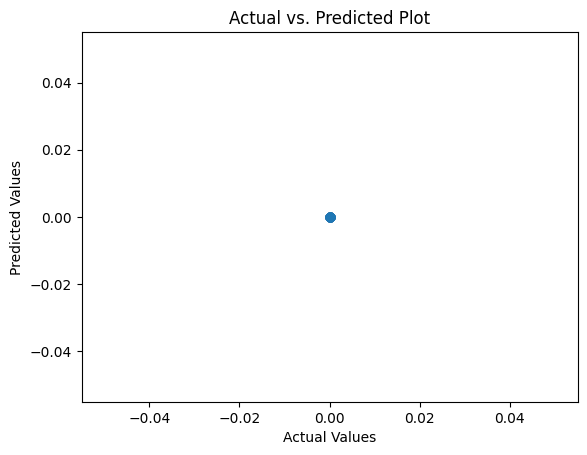

In [ ]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='black', linewidth=2)
plt.show()

**Residual Plot--Residual vs Predicted**

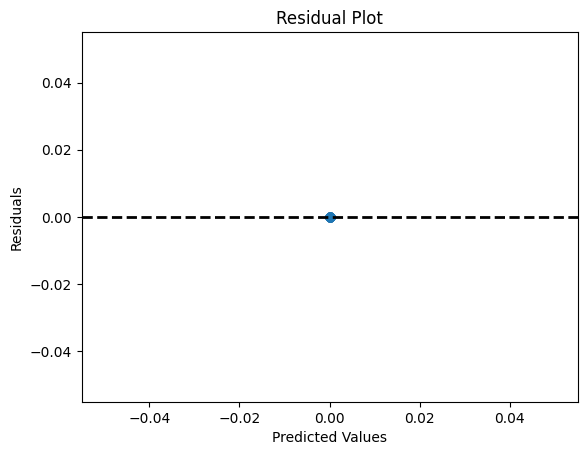

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()

**R2 Score**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {r2}')

R-squared on the test set: 1.0


**Mean Square Error calculation**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 0.0


**Accuracy score**

In [ ]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)
print(f"Training accuracy: {acc_train}")
print(f"test accuracy: {acc_test}")

Training accuracy: 1.0
test accuracy: 1.0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[92]])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


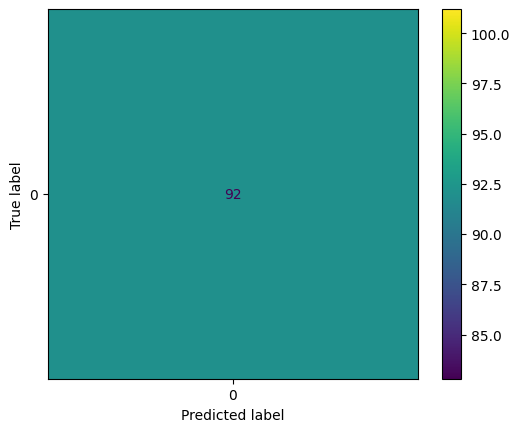

In [ ]:
ConfusionMatrixDisplay.from_estimator(
model,
    X_test,
    y_test
    )

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [5]:
%%writefile requirements.txt
numpy
pandas
matplotlib
seaborn
scikit-learn
imblearn

Overwriting requirements.txt


In [6]:
pip install -r requirements.txt